<a href="https://colab.research.google.com/github/shun1y/signate/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 colab„Å∏„ÅÆ„Éû„Ç¶„É≥„Éà

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 „É©„Ç§„Éñ„É©„É™„ÅÆË™≠„ÅøËæº„Åø

In [ ]:
pip install shap

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 540.1/540.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
# „É©„Ç§„Éñ„É©„É™„ÅÆimport„ÇíË°å„ÅÑ„Åæ„Åô
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from difflib import get_close_matches
import re

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„Å®AUCË©ï‰æ°ÊåáÊ®ô„Çí„Ç§„É≥„Éù„Éº„Éà„Åó„Åæ„Åô„ÄÇ
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Ê¨†ÊêçÂÄ§„ÅÆË£úÂÆå
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# lightgbm
import lightgbm as lgb

# shap
import shap

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 2. „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®Á¢∫Ë™ç


In [ ]:
# Ëá™ÂàÜ„ÅÆ„Éâ„É©„Ç§„Éñ„Å´„Éû„Ç¶„É≥„Éà„Åó„Å¶„ÅÑ„Çã„Å®„Éâ„É©„Ç§„Éñ‰∏ä„ÅÆ„Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøËæº„ÇÄ„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ
# „Éï„Ç°„Ç§„É´„ÅÆÂ†¥ÊâÄ„Åå„Çè„Åã„Çâ„Å™„ÅÑÂ†¥Âêà„ÄÅÂ∑¶„ÅÆ„Çø„Éñ„Åã„ÇâÁõÆÁöÑ„ÅÆ„Éï„Ç°„Ç§„É´„ÇíÊé¢„Åó„ÄÅ„Äå„Éë„Çπ„Çí„Ç≥„Éî„Éº„Äç„Åó„Éö„Éº„Çπ„Éà„Åô„Çã„Åì„Å®„ÅßË™≠„ÅøËæº„ÇÅ„Åæ„Åô„ÄÇ
train = pd.read_csv("/content/drive/MyDrive/SIGNATE_Cup 2024/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/SIGNATE_Cup 2024/data/test.csv")

In [ ]:
train.head()

id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0   0   50Ê≠≥     Self Enquiry         2            900Áßí  Large Business   
1   1   56Ê≠≥  Company Invited         1             14ÂàÜ        Salaried   
2   2   NaN     Self Enquiry         1             10ÂàÜ  Large Business   
3   3  ‰∏âÂçÅ‰∏ÉÊ≠≥     Self Enquiry         2           1080Áßí  Small Business   
4   4   48Ê≠≥  Company Invited         3           1020Áßí  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1                       4   
1                    3.0             2         1                       4   
2                    3.0             4         0                       4   
3                    4.0             1         0                       5   
4                    4.0             4         0                       4   

      Designation MonthlyIncome     customer_info  ProdTaken  
0       Executive      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
1  Senior Manager      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0  
2       Executive      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1  
3  Senior Manager      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0  
4       Executive      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1

In [ ]:
train.shape

(3489, 18)

In [ ]:
test.shape

(3489, 17)

In [ ]:
# value_counts„ÅßÂá∫ÁèæÊï∞„ÇíÁ¢∫Ë™ç„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åô„ÄÇ
train["ProdTaken"].value_counts()

ProdTaken
0    2992
1     497
Name: count, dtype: int64

In [ ]:
train.dtypes

id                          int64
Age                        object
TypeofContact              object
CityTier                    int64
DurationOfPitch            object
Occupation                 object
Gender                     object
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips              object
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome              object
customer_info              object
ProdTaken                   int64
dtype: object

#3.ÂâçÂá¶ÁêÜ

## „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÁµ±Âêà

In [ ]:
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´Ë≠òÂà•Âàó„ÇíËøΩÂä†
train['is_train'] = 1
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´Ë≠òÂà•Âàó„ÇíËøΩÂä†
test['is_train'] = 0

# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å®„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÇíÁµêÂêà
combined_data = pd.concat([train, test], ignore_index=True)

In [ ]:
## Ë°åÂàóÊï∞„ÅÆÁ¢∫Ë™ç
combined_data.shape

(6978, 19)

## Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç

In [ ]:
combined_data.isnull().sum()

id                           0
Age                        193
TypeofContact               18
CityTier                     0
DurationOfPitch            252
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           57
ProductPitched               0
PreferredPropertyStar        0
NumberOfTrips               64
Passport                     0
PitchSatisfactionScore       0
Designation                  0
MonthlyIncome              105
customer_info                0
ProdTaken                 3489
is_train                     0
dtype: int64

## EDA

In [ ]:
combined_data.describe()

id     CityTier  NumberOfPersonVisiting  NumberOfFollowups  \
count  6978.000000  6978.000000             6978.000000        6921.000000   
mean   3488.500000     1.689882                2.401118           7.306892   
std    2014.519422     0.671595                0.734134          37.262885   
min       0.000000     1.000000                1.000000           1.000000   
25%    1744.250000     1.000000                2.000000           3.000000   
50%    3488.500000     2.000000                2.000000           4.000000   
75%    5232.750000     2.000000                3.000000           4.000000   
max    6977.000000     3.000000                4.000000         600.000000   

       PreferredPropertyStar     Passport  PitchSatisfactionScore  \
count            6978.000000  6978.000000             6978.000000   
mean                3.436515     0.098882                2.507022   
std                 0.599600     0.298525                1.134761   
min                 3.000000     0.000000                1.000000   
25%                 3.000000     0.000000                2.000000   
50%                 3.000000     0.000000                2.000000   
75%                 4.000000     0.000000                3.000000   
max                 5.000000     1.000000                5.000000   

         ProdTaken     is_train  
count  3489.000000  6978.000000  
mean      0.142448     0.500000  
std       0.349559     0.500036  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.500000  
75%       0.000000     1.000000  
max       1.000000     1.000000

In [ ]:
combined_data.shape

(6978, 19)

# ÂâçÂá¶ÁêÜ„ÅÆ„Éë„Ç§„Éó„É©„Ç§„É≥

### Age„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
# Êº¢Êï∞Â≠ó„ÇíÁÆóÁî®Êï∞Â≠ó„Å´Â§âÊèõ„Åô„ÇãËæûÊõ∏
kanji_to_num = {
    '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5, 'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10,
    'Áôæ': 100, 'ÂçÉ': 1000
}

# Êº¢Êï∞Â≠ó„ÇíÁÆóÁî®Êï∞Â≠ó„Å´Â§âÊèõ„Åô„ÇãÈñ¢Êï∞
def kanji_to_arabic(kanji):
    num = 0
    unit = 1
    for char in reversed(kanji):
        if char in kanji_to_num:
            if kanji_to_num[char] >= 10:
                unit = kanji_to_num[char]
            else:
                num += kanji_to_num[char] * unit
        elif char == 'Ê≠≥':
            continue
    return num

# ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ„Åô„ÇãÈñ¢Êï∞
def zenkaku_to_hankaku(text):
    return unicodedata.normalize('NFKC', text)

# 'Age'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class AgePreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_age)

    def _preprocess_age(self, age):
        if pd.isna(age):
            return np.nan
        age = str(age)

        # ÂÖ®ËßíÊï∞Â≠ó„ÇíÂçäËßíÊï∞Â≠ó„Å´Â§âÊèõ
        age = zenkaku_to_hankaku(age)

        # Êº¢Êï∞Â≠ó„ÅÆxxÊ≠≥„ÇíÁÆóÁî®Êï∞Â≠ó„ÅÆyyÊ≠≥„Å´Â§âÊèõ
        if 'Ê≠≥' in age:
            match = re.search(r'[‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅÁôæÂçÉ]+Ê≠≥', age)
            if match:
                age = str(kanji_to_arabic(match.group(0)))

        # xx‰ª£„ÅØ‰∏≠Â§ÆÂÄ§„Å´ÂØÑ„Åõ„Çã
        if '10‰ª£' in age:
            # match = re.search(r'(\d+)‰ª£', age)
            # if match:
            age = str(19)

        # xx‰ª£„ÅØ‰∏≠Â§ÆÂÄ§„Å´ÂØÑ„Åõ„Çã
        if '‰ª£' in age:
            match = re.search(r'(\d+)‰ª£', age)
            if match:
                age = str(int(match.group(1)) + 5)

        # Âπ¥ÈΩ¢„ÅÆÊï∞ÂÄ§ÈÉ®ÂàÜ„ÇíÊäú„ÅçÂá∫„Åô
        match = re.search(r'(\d+)', age)
        if match:
            return int(match.group(1))
        return np.nan


# „Éë„Ç§„Éó„É©„Ç§„É≥„ÅÆÊßãÁØâ
age_pipeline = Pipeline([('age_preprocessor', AgePreprocessor())])

# ÂâçÂá¶ÁêÜ„ÅÆÂÆüË°å
combined_data['new_Age'] = age_pipeline.fit_transform(combined_data['Age'])

# 'Age' „Åå 'ÂçÅ‰πùÊ≠≥' „Åß„ÅÇ„ÇãË°å„Å´ÂØæ„Åó„Å¶ 'new_Age' „Å´ 19.0 „Çí‰ª£ÂÖ•
combined_data.loc[combined_data['Age'] == 'ÂçÅ‰πùÊ≠≥', 'new_Age'] = 19.0

# 'new_Age' „Ç´„É©„É†„Çí„ÇÇ„Å®„Å´Âπ¥‰ª£„ÇíË°®„Åô„Ç´„É©„É†„Çí‰ΩúÊàê
def determine_age_group(age):
    if pd.isna(age):
        return np.nan
    elif age < 10:
        return '10Ê≠≥Êú™Ê∫Ä'
    else:
        decade = (age // 10) * 10
        return f'{decade}‰ª£'

# Êñ∞„Åó„ÅÑ„Ç´„É©„É† 'AgeGroup' „Çí‰ΩúÊàê
combined_data['AgeGroup'] = combined_data['new_Age'].apply(determine_age_group)

# Êñ∞„Åó„ÅÑ„Ç´„É©„É†„ÇíÁ¢∫Ë™ç
combined_data[['Age', 'new_Age', 'AgeGroup']].value_counts()

Age   new_Age  AgeGroup
30‰ª£   35.0     30.0‰ª£       224
33Ê≠≥   33.0     30.0‰ª£       194
36Ê≠≥   36.0     30.0‰ª£       188
40‰ª£   45.0     40.0‰ª£       184
37Ê≠≥   37.0     30.0‰ª£       182
32Ê≠≥   32.0     30.0‰ª£       176
35Ê≠≥   35.0     30.0‰ª£       167
34Ê≠≥   34.0     30.0‰ª£       163
31Ê≠≥   31.0     30.0‰ª£       154
40Ê≠≥   40.0     40.0‰ª£       151
38Ê≠≥   38.0     30.0‰ª£       150
42Ê≠≥   42.0     40.0‰ª£       146
30Ê≠≥   30.0     30.0‰ª£       146
39Ê≠≥   39.0     30.0‰ª£       142
41Ê≠≥   41.0     40.0‰ª£       132
43Ê≠≥   43.0     40.0‰ª£       124
50Ê≠≥   50.0     50.0‰ª£       118
45Ê≠≥   45.0     40.0‰ª£       117
50‰ª£   55.0     50.0‰ª£       117
52Ê≠≥   52.0     50.0‰ª£       114
51Ê≠≥   51.0     50.0‰ª£       113
28Ê≠≥   28.0     20.0‰ª£       111
49Ê≠≥   49.0     40.0‰ª£       106
47Ê≠≥   47.0     40.0‰ª£       104
44Ê≠≥   44.0     40.0‰ª£       104
29Ê≠≥   29.0     20.0‰ª£       101
46Ê≠≥   46.0     40.0‰ª£       100
53Ê≠≥   53.0     50.0‰ª£        95
55Ê≠≥   55.0     50.0‰ª£        92
26Ê≠≥   26.0     20.0‰ª£        88
20‰ª£   25.0     20.0‰ª£        87
54Ê≠≥   54.0     50.0‰ª£        87
48Ê≠≥   48.0     40.0‰ª£        86
27Ê≠≥   27.0     20.0‰ª£        84
56Ê≠≥   56.0     50.0‰ª£        80
25Ê≠≥   25.0     20.0‰ª£        77
24Ê≠≥   24.0     20.0‰ª£        69
57Ê≠≥   57.0     50.0‰ª£        65
22Ê≠≥   22.0     20.0‰ª£        58
23Ê≠≥   23.0     20.0‰ª£        56
58Ê≠≥   58.0     50.0‰ª£        47
20Ê≠≥   20.0     20.0‰ª£        37
21Ê≠≥   21.0     20.0‰ª£        37
59Ê≠≥   59.0     50.0‰ª£        36
34Êâç   34.0     30.0‰ª£        29
ÔºìÔºìÊ≠≥   33.0     30.0‰ª£        27
36Êâç   36.0     30.0‰ª£        26
31Êâç   31.0     30.0‰ª£        24
ÔºìÔºê‰ª£   35.0     30.0‰ª£        24
29Êâç   29.0     20.0‰ª£        22
ÔºìÔºóÊ≠≥   37.0     30.0‰ª£        21
60Ê≠≥   60.0     60.0‰ª£        21
39Êâç   39.0     30.0‰ª£        20
ÔºìÔºïÊ≠≥   35.0     30.0‰ª£        20
ÔºîÔºìÊ≠≥   43.0     40.0‰ª£        19
28Êâç   28.0     20.0‰ª£        19
ÔºìÔºòÊ≠≥   38.0     30.0‰ª£        19
ÔºìÔºñÊ≠≥   36.0     30.0‰ª£        19
ÔºìÔºôÊ≠≥   39.0     30.0‰ª£        19
ÔºîÔºê‰ª£   45.0     40.0‰ª£        19
51Êâç   51.0     50.0‰ª£        18
ÔºìÔºîÊ≠≥   34.0     30.0‰ª£        18
32Êâç   32.0     30.0‰ª£        18
ÔºìÔºíÊ≠≥   32.0     30.0‰ª£        18
48Êâç   48.0     40.0‰ª£        17
46Èöõ   46.0     40.0‰ª£        17
19Ê≠≥   19.0     10.0‰ª£        17
‰∏âÂçÅ‰∏âÊ≠≥  33.0     30.0‰ª£        17
ÔºìÔºëÊ≠≥   31.0     30.0‰ª£        16
27Êâç   27.0     20.0‰ª£        16
33Êâç   33.0     30.0‰ª£        16
ÔºîÔºíÊ≠≥   42.0     40.0‰ª£        15
ÔºîÔºïÊ≠≥   45.0     40.0‰ª£        15
46Êâç   46.0     40.0‰ª£        15
35Êâç   35.0     30.0‰ª£        15
38Êâç   38.0     30.0‰ª£        15
41Êâç   41.0     40.0‰ª£        15
50Êâç   50.0     50.0‰ª£        15
ÔºìÔºêÊ≠≥   30.0     30.0‰ª£        15
18Ê≠≥   18.0     10.0‰ª£        14
53Êâç   53.0     50.0‰ª£        14
52Êâç   52.0     50.0‰ª£        14
49Êâç   49.0     40.0‰ª£        14
54Êâç   54.0     50.0‰ª£        14
42Êâç   42.0     40.0‰ª£        14
37Êâç   37.0     30.0‰ª£        14
ÔºîÔºëÊ≠≥   41.0     40.0‰ª£        14
ÔºïÔºê‰ª£   55.0     50.0‰ª£        14
ÔºïÔºîÊ≠≥   54.0     50.0‰ª£        13
ÂõõÂçÅ‰∏ÄÊ≠≥  41.0     40.0‰ª£        13
ÔºïÔºìÊ≠≥   53.0     50.0‰ª£        13
45Êâç   45.0     40.0‰ª£        13
‰∏âÂçÅ‰∏ÄÊ≠≥  31.0     30.0‰ª£        13
39Èöõ   39.0     30.0‰ª£        12
ÔºíÔºôÊ≠≥   29.0     20.0‰ª£        12
ÔºïÔºêÊ≠≥   50.0     50.0‰ª£        12
34Èöõ   34.0     30.0‰ª£        12
55Êâç   55.0     50.0‰ª£        12
29Èöõ   29.0     20.0‰ª£        12
51Èöõ   51.0     50.0‰ª£        12
24Êâç   24.0     20.0‰ª£        12
ÔºîÔºñÊ≠≥   46.0     40.0‰ª£        11
‰∏âÂçÅÂÖ≠Ê≠≥  36.0     30.0‰ª£        11
ÂõõÂçÅ‰∏ÉÊ≠≥  47.0     40.0‰ª£        11
‰∏âÂçÅÂÖ´Ê≠≥  38.0     30.0‰ª£        11
ÔºîÔºóÊ≠≥   47.0     40.0‰ª£        11
‰∏âÂçÅÊ≠≥   30.0     30.0‰ª£        11
‰∏âÂçÅ‰∏ÉÊ≠≥  37.0     30.0‰ª£        11
41Èöõ   41.0     40.0‰ª£        11
ÔºíÔºòÊ≠≥   28.0     20

### TypeofContact„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['TypeofContact'].fillna('Unknown', inplace=True)
combined_data['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       4444
Company Invited    2516
Unknown              18
Name: count, dtype: int64

### DurationOfPitch„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['DurationOfPitch'].value_counts()

DurationOfPitch
8ÂàÜ       495
9ÂàÜ       488
15ÂàÜ      432
16ÂàÜ      408
14ÂàÜ      398
10ÂàÜ      366
7ÂàÜ       322
13ÂàÜ      299
11ÂàÜ      233
17ÂàÜ      230
12ÂàÜ      206
480Áßí     176
540Áßí     166
900Áßí     137
6ÂàÜ       133
420Áßí     124
840Áßí     120
960Áßí     119
600Áßí     101
780Áßí      98
18ÂàÜ       97
720Áßí      87
1020Áßí     82
23ÂàÜ       76
32ÂàÜ       75
660Áßí      73
24ÂàÜ       67
31ÂàÜ       61
22ÂàÜ       60
25ÂàÜ       59
34ÂàÜ       55
26ÂàÜ       51
33ÂàÜ       50
20ÂàÜ       50
30ÂàÜ       49
21ÂàÜ       48
28ÂàÜ       42
27ÂàÜ       42
19ÂàÜ       41
35ÂàÜ       41
1080Áßí     36
360Áßí      34
29ÂàÜ       28
1380Áßí     28
5ÂàÜ        25
1860Áßí     25
1320Áßí     24
1740Áßí     20
1500Áßí     20
2040Áßí     20
1980Áßí     19
1440Áßí     19
300Áßí      18
1920Áßí     18
1260Áßí     17
2100Áßí     17
1800Áßí     16
1200Áßí     16
1620Áßí     15
1680Áßí     14
1560Áßí     13
36ÂàÜ       10
1140Áßí      9
2160Áßí      5
4ÂàÜ         2
240Áßí       1
Name: count, dtype: int64

In [ ]:
class DurationOfPitchPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # „Çπ„ÉÜ„ÉÉ„Éó1: xxÁßí„Å®„Å™„Å£„Å¶„ÅÑ„Çã„Ç´„É©„É†„ÇíÁâπÂÆö
        seconds_mask = X.str.contains('Áßí', na=False)

        # „Çπ„ÉÜ„ÉÉ„Éó2: 60„ÅßÂâ≤„Å£„Å¶yyÂàÜ„Å´Â§âÊèõ
        X.loc[seconds_mask] = X.loc[seconds_mask].str.replace('Áßí', '').astype(float) / 60

        # „Çπ„ÉÜ„ÉÉ„Éó3: Êï∞ÂÄ§ÈÉ®ÂàÜ„ÅÆ„Åø„ÇíÊäú„ÅçÂá∫„Åô(xxÂàÜ„ÅÆÂàÜ„ÇíÂâäÈô§)
        X = X.str.replace('ÂàÜ', '')

        # „Çπ„ÉÜ„ÉÉ„Éó4: Ê¨†ÊêçÂÄ§„ÇíË£úÂÆåÔºà‰æã: np.nan„ÅßË£úÂÆåÔºâ
        X = X.astype(float)
        X.fillna(np.nan, inplace=True)

        # „Çπ„ÉÜ„ÉÉ„Éó5: Âûã„Çífloat„Åã„Çâint„Å´Â§âÊèõ
        # X = X.astype(int)

        return X

duration_of_pitch_pipeline = Pipeline([
    ('duration_of_pitch_preprocessor', DurationOfPitchPreprocessor())
])

combined_data['DurationOfPitch'] = duration_of_pitch_pipeline.fit_transform(combined_data['DurationOfPitch'])

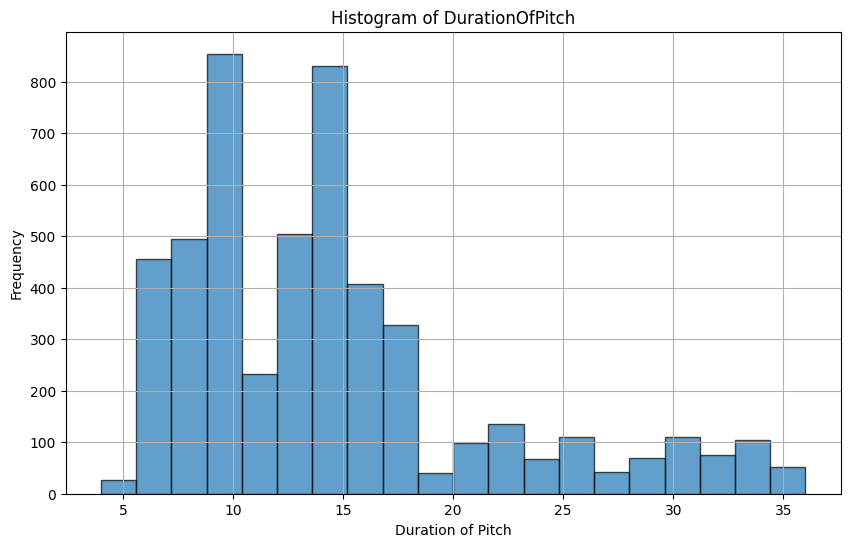

In [ ]:
# 'DurationOfPitch' „Ç´„É©„É†„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÊèèÁîª
plt.figure(figsize=(10, 6))
plt.hist(combined_data['DurationOfPitch'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of DurationOfPitch')
plt.xlabel('Duration of Pitch')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Occupation„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['Occupation'].value_counts()

Occupation
Small Business    3456
Salaried          2801
Large Business     721
Name: count, dtype: int64

### gender„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['Gender'].value_counts()

Gender
Male       2525
Female     1441
male        940
female      504
MALE        363
Ôº≠ÔΩÅÔΩåÔΩÖ        260
Fe Male     213
FEMALE      197
Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ      181
ÔΩçÔΩÅÔΩåÔΩÖ         92
ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ       65
fe male      57
FE MALE      43
Ôº≠Ôº°Ôº¨Ôº•         38
Ôº¶ÔΩÖ„ÄÄÔº≠ÔΩÅÔΩåÔΩÖ      26
Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•       21
ÔΩÜÔΩÖ„ÄÄÔΩçÔΩÅÔΩåÔΩÖ      11
Ôº¶Ôº•„ÄÄÔº≠Ôº°Ôº¨Ôº•       1
Name: count, dtype: int64

In [ ]:
# ÊÄßÂà•„ÅÆÊ®ôÊ∫ñÂåñ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class GenderStandardizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._standardize_gender)

    def _standardize_gender(self, gender):
        gender = zenkaku_to_hankaku(gender)  # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ
        gender = gender.lower()  # Â∞èÊñáÂ≠ó„Å´Â§âÊèõ
        gender = gender.replace(' ', '')  # „Çπ„Éö„Éº„Çπ„ÇíÂâäÈô§
        if 'female' in gender:
            return 1
        elif 'male' in gender:
            return 0
        else:
            return np.nan  # ‰∏çÊòé„Å™Â†¥Âêà

gender_pipeline = Pipeline([
    ('gender_standardizer', GenderStandardizer())
])

combined_data['Gender'] = gender_pipeline.fit_transform(combined_data['Gender'])


# combined_data['Gender'].value_counts()
# combined_data[['Gender', 'new_Gender']].value_counts()

In [ ]:
# combined_data['new_Gender'].value_counts()

### NumberOfPersonVisiting„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['NumberOfPersonVisiting'].value_counts()

NumberOfPersonVisiting
2.0    3163
3.0    2773
1.0     686
4.0     356
Name: count, dtype: int64

### NumberOfFollowups„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0      2746
3.0      2536
5.0      1113
2.0       212
1.0       176
6.0        69
400.0      31
300.0      25
500.0       9
100.0       2
600.0       1
200.0       1
Name: count, dtype: int64

In [ ]:
# 'NumberOfFollowups'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class NumberOfFollowupsPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.apply(lambda x: x / 100 if x >= 100 else x)  # 100‰ª•‰∏ä„ÅÆÂÄ§„Çí100„ÅßÂâ≤„Çã
        return X.fillna(np.nan)  # Ê¨†ÊêçÂÄ§„Çí0„ÅßË£úÂÆå„Åô„Çã

number_of_followups_pipeline = Pipeline([
    ('number_of_followups_preprocessor', NumberOfFollowupsPreprocessor())
])

combined_data['NumberOfFollowups'] = number_of_followups_pipeline.fit_transform(combined_data['NumberOfFollowups'])
combined_data['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0    2777
3.0    2561
5.0    1122
2.0     213
1.0     178
6.0      70
Name: count, dtype: int64

### ProductPitched„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
# 'ProductPitched'„ÅÆÂâçÂá¶ÁêÜ„Å®ÂàÜÈ°û„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class ProductPitchedPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categories = ['basic', 'deluxe', 'standard', 'superdeluxe', 'king']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_and_categorize)

    def _preprocess_and_categorize(self, product):
        product = zenkaku_to_hankaku(product)  # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ
        product = product.lower()  # Â§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
        product = product.replace(' ', '')  # „Çπ„Éö„Éº„Çπ„ÇíÂâäÈô§
        closest_match = get_close_matches(product, self.categories, n=1, cutoff=0.0)
        return closest_match[0] if closest_match else 'unknown'

product_pitched_pipeline = Pipeline([
    ('product_pitched_preprocessor', ProductPitchedPreprocessor())
])

combined_data['ProductPitched'] = product_pitched_pipeline.fit_transform(combined_data['ProductPitched'])


### PreferredPropertyStar„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    4328
4.0    2254
5.0     396
Name: count, dtype: int64

### NumberOfTrips„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['NumberOfTrips'].value_counts()

NumberOfTrips
2         1956
3         1461
5          836
1          669
7          445
Âπ¥„Å´2Âõû       294
4          277
Âπ¥„Å´3Âõû       245
6          234
Âπ¥„Å´5Âõû       141
Âπ¥„Å´1Âõû       132
Âπ¥„Å´7Âõû        68
Âπ¥„Å´4Âõû        50
Âπ¥„Å´6Âõû        47
ÂçäÂπ¥„Å´1Âõû       27
8           20
Âπ¥„Å´8Âõû         6
ÂõõÂçäÊúü„Å´1Âõû       6
Name: count, dtype: int64

In [ ]:
# 'NumberOfTrips'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class NumberOfTripsPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_number_of_trips)

    def _preprocess_number_of_trips(self, trips):
        if pd.isnull(trips):
            return np.nan
        trips = str(trips)

        # Âπ¥„Å´xxÂõû
        match = re.search(r'Âπ¥„Å´(\d+)Âõû', trips)
        if match:
            return int(match.group(1))

        # ÂçäÂπ¥„Å´yÂõû
        match = re.search(r'ÂçäÂπ¥„Å´(\d+)Âõû', trips)
        if match:
            return int(match.group(1)) * 2

        # ÂõõÂçäÊúü„Å´zÂõû
        match = re.search(r'ÂõõÂçäÊúü„Å´(\d+)Âõû', trips)
        if match:
            return int(match.group(1)) * 4

        return trips

number_of_trips_pipeline = Pipeline([
    ('number_of_trips_preprocessor', NumberOfTripsPreprocessor())
])

combined_data['NumberOfTrips'] = number_of_trips_pipeline.fit_transform(combined_data['NumberOfTrips'])
# Êï∞ÂÄ§Âûã„Å´Â§âÊèõ
combined_data['NumberOfTrips'] = pd.to_numeric(combined_data['NumberOfTrips'], errors='coerce')
# combined_data[['NumberOfTrips', 'new_NumberOfTrips']].value_counts()

In [ ]:
combined_data['NumberOfTrips'].value_counts()

NumberOfTrips
2.0    2250
3.0    1706
5.0     977
1.0     828
7.0     513
4.0     333
6.0     281
8.0      26
Name: count, dtype: int64

### Passport„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['Passport'].value_counts()

Passport
0    6288
1     690
Name: count, dtype: int64

### PitchSatisfactionScore„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['PitchSatisfactionScore'].value_counts()

PitchSatisfactionScore
2    2500
4    1452
1    1439
3    1344
5     243
Name: count, dtype: int64

### Designation„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
combined_data['Designation'].value_counts()

Designation
Executive         2219
Manager           2027
Senior Manager    1565
AVP                604
VP                 259
Ex–µcutive           19
Ex–µcutiv–µ           19
Œúanager             18
Manag–µr             18
Executiv–µ           16
ManŒ±ger             16
–êVP                 14
MŒ±nager             13
Executi—µe           13
Senior Manag–µr      12
ŒëVP                 11
–ïxecutive            8
Manageùôß              8
S–µnior Manager       7
Senioùôß Manager       6
Senior ManŒ±ger       6
ExecuÔΩîive            6
Senior Manageùôß       5
VÔº∞                   5
’èenior Manager       4
AVÔº∞                  4
Senior MŒ±nŒ±ger       4
MŒ±nŒ±ger              4
E√óecutive            4
ExecÔΩïtive            4
–Öenior Manager       4
Ex–µcuti—µ–µ            3
Ex–µcÔΩïtive            2
Ex–µcÔΩïtiv–µ            2
MŒ±nag–µr              2
Senior MŒ±nager       2
ŒúŒ±nager              2
Senior Œúanager       2
S–µnior Manag–µr       2
Senior Manag–µùôß       2
–ïxecutiv–µ            2
–ï√ó–µcutive            2
Executi—µ–µ            2
MŒ±nageùôß              2
ManŒ±g–µr              2
’èenior Œúanager       2
–êVÔº∞                  1
–ïxecÔΩïtive            1
MŒ±nŒ±g–µr              1
Ex–µcuÔΩîive            1
Senioùôß MŒ±nageùôß       1
ExecÔΩïtiv–µ            1
S–µnior Manag–µùôß       1
Senior ŒúanŒ±ger       1
Senioùôß Manag–µr       1
Manag–µùôß              1
ExecÔΩïÔΩîive            1
ŒúŒ±nag–µr              1
–Öenior ManŒ±ger       1
–Öenior Œúanageùôß       1
Senioùôß ManŒ±ger       1
E√ó–µcuti—µe            1
ŒëVÔº∞                  1
Senioùôß Manageùôß       1
–ï√óecutive            1
Œúanageùôß              1
–ïx–µcutiv–µ            1
–ïxecuÔΩîive            1
E√óecÔΩïtive            1
Œúanag–µr              1
S–µnioùôß Manager       1
Name: count, dtype: int64

In [ ]:
# 'Designation'„ÅÆÂâçÂá¶ÁêÜ„Å®ÂàÜÈ°û„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class DesignationPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categories = ['executive', 'manager', 'seniormanager', 'avp', 'vp']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_and_categorize)

    def _preprocess_and_categorize(self, designation):
        designation = zenkaku_to_hankaku(designation)  # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ
        designation = designation.lower()  # Â§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
        designation = designation.replace(' ', '')  # „Çπ„Éö„Éº„Çπ„ÇíÂâäÈô§
        closest_match = get_close_matches(designation, self.categories, n=1, cutoff=0.0)
        return closest_match[0] if closest_match else 'unknown'

designation_pipeline = Pipeline([
    ('designation_preprocessor', DesignationPreprocessor())
])

combined_data['new_Designation'] = designation_pipeline.fit_transform(combined_data['Designation'])
#'Designation' „Ç´„É©„É†„ÅÆÊñáÂ≠óÊï∞„ÇíË®àÁÆó„Åó„ÄÅÊñ∞„Åó„ÅÑ„Ç´„É©„É† 'Designation_Length' „Å´ËøΩÂä†
combined_data['Designation_Length'] = combined_data['Designation'].apply(len)

# Êù°‰ª∂„Å´Âü∫„Å•„ÅÑ„Å¶ 'new_Designation' „Çí 'avp' „Å´ÁΩÆ„ÅçÊèõ„Åà
combined_data.loc[(combined_data['Designation_Length'] >= 3) & (combined_data['new_Designation'] == 'vp'), 'new_Designation'] = 'avp'

combined_data[['Designation', 'new_Designation']].value_counts()

Designation     new_Designation
Executive       executive          2219
Manager         manager            2027
Senior Manager  seniormanager      1565
AVP             avp                 604
VP              vp                  259
Ex–µcutive       executive            19
Ex–µcutiv–µ       executive            19
Manag–µr         manager              18
Œúanager         manager              18
ManŒ±ger         manager              16
Executiv–µ       executive            16
–êVP             avp                  14
Executi—µe       executive            13
MŒ±nager         manager              13
Senior Manag–µr  seniormanager        12
ŒëVP             avp                  11
–ïxecutive       executive             8
Manageùôß         manager               8
S–µnior Manager  seniormanager         7
Senioùôß Manager  seniormanager         6
Senior ManŒ±ger  seniormanager         6
ExecuÔΩîive       executive             6
VÔº∞              vp                    5
Senior Manageùôß  seniormanager         5
AVÔº∞             avp                   4
MŒ±nŒ±ger         manager               4
Senior MŒ±nŒ±ger  seniormanager         4
’èenior Manager  seniormanager         4
E√óecutive       executive             4
–Öenior Manager  seniormanager         4
ExecÔΩïtive       executive             4
Ex–µcuti—µ–µ       executive             3
S–µnior Manag–µr  seniormanager         2
–ï√ó–µcutive       executive             2
Senior Œúanager  seniormanager         2
ŒúŒ±nager         manager               2
–ïxecutiv–µ       executive             2
Senior MŒ±nager  seniormanager         2
’èenior Œúanager  seniormanager         2
ManŒ±g–µr         manager               2
Executi—µ–µ       executive             2
Senior Manag–µùôß  seniormanager         2
Ex–µcÔΩïtive       executive             2
MŒ±nag–µr         manager               2
Ex–µcÔΩïtiv–µ       executive             2
MŒ±nageùôß         manager               2
–Öenior Œúanageùôß  seniormanager         1
–êVÔº∞             avp                   1
Ex–µcuÔΩîive       executive             1
ExecÔΩïÔΩîive       executive             1
–ïxecuÔΩîive       executive             1
–ïxecÔΩïtive       executive             1
–ïx–µcutiv–µ       executive             1
–ï√óecutive       executive             1
ExecÔΩïtiv–µ       executive             1
–Öenior ManŒ±ger  seniormanager         1
Senior ŒúanŒ±ger  seniormanager         1
ŒúŒ±nag–µr         manager               1
E√óecÔΩïtive       executive             1
Œúanageùôß         manager               1
E√ó–µcuti—µe       executive             1
ŒëVÔº∞             avp                   1
Manag–µùôß         manager               1
S–µnioùôß Manager  seniormanager         1
S–µnior Manag–µùôß  seniormanager         1
MŒ±nŒ±g–µr         manager               1
Senioùôß MŒ±nageùôß  seniormanager         1
Senioùôß ManŒ±ger  seniormanager         1
Senioùôß Manag–µr  seniormanager         1
Senioùôß Manageùôß  seniormanager         1
Œúanag–µr         manager               1
Name: count, dtype: int64

### MonthlyIncome„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
# 'MonthlyIncome'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class MonthlyIncomePreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_monthly_income)

    def _preprocess_monthly_income(self, income):
        if pd.isna(income):
            return np.nan
        income = str(income)

        # xx.x‰∏áÂÜÜ„ÅÆÈÉ®ÂàÜ„ÇíÊäú„ÅçÂá∫„Åô
        match = re.search(r'(\d+(\.\d+)?)‰∏áÂÜÜ', income)
        if match:
            return int(float(match.group(1)) * 10000)

        # „Åù„Çå‰ª•Â§ñ„ÅÆÂÄ§„ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®ÔºàÈÅ©Âàá„Å™Âá¶ÁêÜ„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„ÇìÔºâ
        try:
            return int(float(income))
        except ValueError:
            return np.nan

monthly_income_pipeline = Pipeline([
    ('monthly_income_preprocessor', MonthlyIncomePreprocessor())
])

combined_data['MonthlyIncome'] = monthly_income_pipeline.fit_transform(combined_data['MonthlyIncome'])

# combined_data[['MonthlyIncome', 'new_MonthlyIncome']].value_counts()

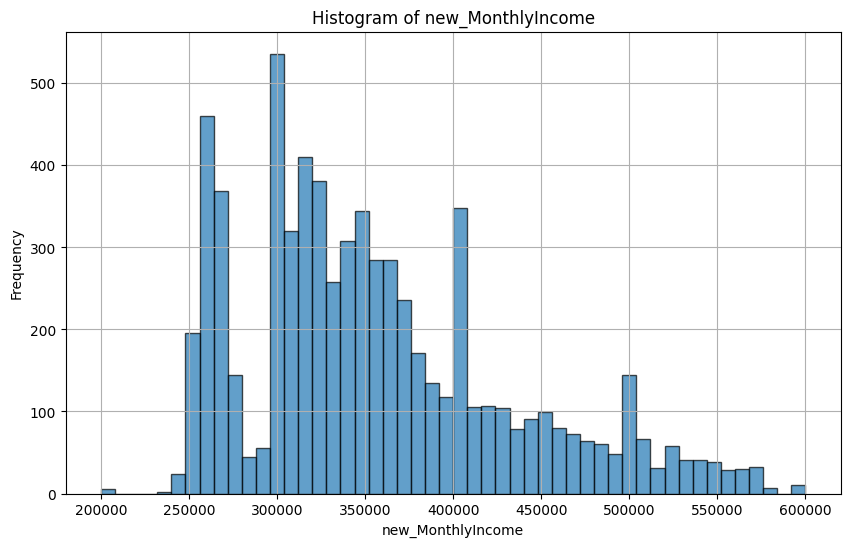

In [ ]:
# 'new_MonthlyIncome' „ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÁ¥∞„Åã„ÅèÊèèÁîªÔºà„Éì„É≥„ÅÆÊï∞„ÇíÂ¢ó„ÇÑ„ÅôÔºâ
plt.figure(figsize=(10, 6))
combined_data['MonthlyIncome'].hist(bins=50, edgecolor='k', alpha=0.7)  # bins„ÅÆÂÄ§„ÇíÂ§ß„Åç„Åè„Åó„Å¶„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÁ¥∞„Åã„Åè
plt.title('Histogram of new_MonthlyIncome')
plt.xlabel('new_MonthlyIncome')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### customer_info„ÅÆÂâçÂá¶ÁêÜ

In [ ]:
# 'customer_info'„ÅÆÂàÜÂâ≤„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class CustomerInfoSplitter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._split_customer_info)

    def _split_customer_info(self, text):
        delimiters = '[„ÄÅ, /Ôºè\u3000\t\n]'
        split_info = re.split(delimiters, text)
        split_info = (split_info + [None, None, None])[:3]
        return pd.Series(split_info)

# 'customer_info_2'„Åã„Çâ'has_car'„Çí‰ΩúÊàê„Åô„Çã„ÇØ„É©„Çπ
class HasCarExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        car_keywords = ['ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ','Ëªä„ÅÇ„Çä','Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ']
        return X.apply(lambda info: 1 if any(keyword == str(info) for keyword in car_keywords) else 0)

# 'customer_info_3'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class ChildInfoExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        has_unknown_child_keywords = ['Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé', '‰∏çÊòé', 'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé', 'Â≠ê„ÅÆÊï∞‰∏çË©≥', '„Çè„Åã„Çâ„Å™„ÅÑ']
        has_child_keywords = ['Â≠ê‰æõ1‰∫∫', 'Â≠ê‰æõ2‰∫∫', '„Åì„Å©„ÇÇ1‰∫∫', '„Åì„Å©„ÇÇ2‰∫∫', 'Â≠ê‰æõÊúâ„Çä', '1ÂÖê', 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)', 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)', '2ÂÖê', 'Â≠ê‰æõ3‰∫∫', '„Åì„Å©„ÇÇ3‰∫∫', '3ÂÖê', 'Â≠ê‰æõÊúâ„Çä(3‰∫∫)']
        has_no_child_keywords = ['Â≠ê‰æõ„Å™„Åó', 'Â≠ê‰æõÁÑ°„Åó', 'Â≠ê‰æõ„Çº„É≠', 'ÁÑ°Â≠ê', 'ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠']
        has_one_child_keywords = ['Â≠ê‰æõ1‰∫∫', '„Åì„Å©„ÇÇ1‰∫∫', '1ÂÖê', 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)']
        has_two_child_keywords = ['Â≠ê‰æõ2‰∫∫', '„Åì„Å©„ÇÇ2‰∫∫', 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)', '2ÂÖê']
        has_three_child_keywords = ['Â≠ê‰æõ3‰∫∫', '„Åì„Å©„ÇÇ3‰∫∫', '3ÂÖê', 'Â≠ê‰æõÊúâ„Çä(3‰∫∫)']

        def extract_child_info(info):
            info = str(info)
            if any(keyword in info for keyword in has_unknown_child_keywords):
                return np.nan, np.nan
            elif any(keyword in info for keyword in has_no_child_keywords):
                return 0, 0
            elif any(keyword in info for keyword in has_one_child_keywords):
                return 1, 1
            elif any(keyword in info for keyword in has_two_child_keywords):
                return 2, 1
            elif any(keyword in info for keyword in has_three_child_keywords):
                return 3, 1
            elif any(keyword in info for keyword in has_child_keywords):
                return np.nan, 1
            else:
                return np.nan, np.nan

        # ÂêÑ„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶child_num„Å®has_child„ÇíÊäΩÂá∫
        extracted_info = X.apply(extract_child_info)

        # DataFrame„Å´Â§âÊèõ
        extracted_df = pd.DataFrame(extracted_info.tolist(), columns=['child_num', 'has_child'])

        return extracted_df

customer_info_pipeline = Pipeline([
    ('customer_info_splitter', CustomerInfoSplitter())
])

car_pipeline = Pipeline([
    ('has_car_extractor', HasCarExtractor())
])

child_pipeline = Pipeline([
    ('child_info_extractor', ChildInfoExtractor())
])

customer_info_split = customer_info_pipeline.fit_transform(combined_data['customer_info'])
combined_data[['customer_info_1', 'customer_info_2', 'customer_info_3']] = customer_info_split

combined_data['has_car'] = car_pipeline.fit_transform(combined_data['customer_info_2'])
# 'has_car' „Ç´„É©„É†„ÇíËøΩÂä†„Åó„ÄÅÊù°‰ª∂„Å´Âü∫„Å•„ÅÑ„Å¶ÂÄ§„Çí‰ª£ÂÖ•
# 'has_car' „Ç´„É©„É†„ÇíÊù°‰ª∂„Å´Âü∫„Å•„ÅÑ„Å¶Êõ¥Êñ∞
combined_data['has_car'] = combined_data['has_car'].mask(combined_data['customer_info_2'] == 'Ëªä‰øùÊúâ„Å™„Åó	', 0)
combined_data['has_car'] = combined_data['has_car'].mask(combined_data['customer_info_2'] == 'Ëªä„ÅÇ„Çä', 1)


child_info = child_pipeline.fit_transform(combined_data['customer_info_3'])
combined_data['child_num'] = child_info['child_num']
combined_data['has_child'] = child_info['has_child']

# „Ç´„É©„É†Âêç„ÇíÂ§âÊõ¥
combined_data['marry_status'] = combined_data['customer_info_1']

# „Éû„ÉÉ„Éî„É≥„Ç∞„ÇíÂÆöÁæ©
marry_status_mapping = {
    'ÁµêÂ©öÊ∏à„Åø': 'Married',
    'Èõ¢Â©öÊ∏à„Åø': 'Divorced',
    'Áã¨Ë∫´': 'Single',
    'Êú™Â©ö': 'Ummarried'
}

# 'marry_status'„ÅÆÂÄ§„ÇíËã±Ë™û„Å´Â§âÊèõ
combined_data['marry_status'] = combined_data['marry_status'].map(marry_status_mapping)

In [ ]:
# combined_data['customer_info_1'].value_counts()
combined_data['marry_status'].value_counts()
# combined_data['marry_status'].isnull().sum()

combined_data[['marry_status','customer_info_1']].value_counts()

marry_status  customer_info_1
Married       ÁµêÂ©öÊ∏à„Åø               2846
Divorced      Èõ¢Â©öÊ∏à„Åø               1688
Single        Áã¨Ë∫´                 1309
Ummarried     Êú™Â©ö                 1135
Name: count, dtype: int64

In [ ]:
# combined_data['customer_info_1'].value_counts()
combined_data[['has_car','customer_info_2']].value_counts()
# combined_data['marry_status'].isnull().sum()

has_car  customer_info_2
0        ËªäÊú™ÊâÄÊåÅ               1674
1        ËªäÊâÄÊåÅ                1573
0        Ëá™ÂãïËªäÊú™ÊâÄÊúâ              887
1        Ëá™ÂãïËªäÊâÄÊúâ               789
0        Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó              412
1        Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä              405
0        ‰πóÁî®Ëªä„Å™„Åó               239
1        ‰πóÁî®ËªäÊâÄÊåÅ               214
0        Ëªä„Å™„Åó                 205
         Ëªä‰øùÊúâ„Å™„Åó               202
1        Ëªä‰øùÊúâ                 200
         Ëªä„ÅÇ„Çä                 178
Name: count, dtype: int64

In [ ]:
combined_data['has_car'].isnull().sum()

0

In [ ]:
# combined_data['customer_info_1'].value_counts()
combined_data[['customer_info_3', 'has_child', 'child_num']].value_counts(dropna=False)
# combined_data['marry_status'].isnull().sum()

customer_info_3  has_child  child_num
Â≠ê‰æõ1‰∫∫             1.0        1.0          1699
Â≠ê‰æõ„Å™„Åó             0.0        0.0          1038
Â≠ê‰æõ2‰∫∫             1.0        2.0           921
„Åì„Å©„ÇÇ1‰∫∫            1.0        1.0           832
Â≠ê‰æõÁÑ°„Åó             0.0        0.0           507
„Åì„Å©„ÇÇ2‰∫∫            1.0        2.0           456
Â≠ê‰æõÊúâ„Çä             1.0        NaN           321
1ÂÖê               1.0        1.0           220
Â≠ê‰æõÊúâ„Çä(1‰∫∫)         1.0        1.0           194
Â≠ê‰æõ„Çº„É≠             0.0        0.0           125
ÁÑ°Â≠ê               0.0        0.0           121
ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠            0.0        0.0           118
Â≠ê‰æõÊúâ„Çä(2‰∫∫)         1.0        2.0           115
2ÂÖê               1.0        2.0           108
Â≠ê‰æõ3‰∫∫             1.0        3.0            70
Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé           NaN        NaN            39
„Åì„Å©„ÇÇ3‰∫∫            1.0        3.0            38
‰∏çÊòé               NaN        NaN            17
3ÂÖê               1.0        3.0            14
Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé          NaN        NaN             8
Â≠ê‰æõÊúâ„Çä(3‰∫∫)         1.0        3.0             7
Â≠ê„ÅÆÊï∞‰∏çË©≥            NaN        NaN             5
„Çè„Åã„Çâ„Å™„ÅÑ            NaN        NaN             5
Name: count, dtype: int64

# ÂâçÂá¶ÁêÜÂæå„ÅÆ„Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç

In [ ]:
combined_data.isnull().sum()

id                           0
Age                        193
TypeofContact                0
CityTier                     0
DurationOfPitch           1939
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           57
ProductPitched               0
PreferredPropertyStar        0
NumberOfTrips               64
Passport                     0
PitchSatisfactionScore       0
Designation                  0
MonthlyIncome              105
customer_info                0
ProdTaken                 3489
is_train                     0
new_Age                    193
AgeGroup                   193
new_Designation              0
Designation_Length           0
customer_info_1              0
customer_info_2              0
customer_info_3              0
has_car                      0
child_num                  395
has_child                   74
marry_status                 0
dtype: int64

In [ ]:
# new_Designation„ÇíDesignation„Å´‰ª£ÂÖ•
combined_data['Designation'] = combined_data['new_Designation']
combined_data['Age'] = combined_data['new_Age']

# ÊåáÂÆö„Åï„Çå„Åü„Ç´„É©„É†„ÇíÂâäÈô§
combined_data = combined_data.drop(columns=['customer_info', 'customer_info_1', 'customer_info_2', 'customer_info_3', 'new_Designation', 'Designation_Length','new_Age'])

# ÁµêÊûú„ÇíÁ¢∫Ë™ç
combined_data.isnull().sum()

id                           0
Age                        193
TypeofContact                0
CityTier                     0
DurationOfPitch           1939
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           57
ProductPitched               0
PreferredPropertyStar        0
NumberOfTrips               64
Passport                     0
PitchSatisfactionScore       0
Designation                  0
MonthlyIncome              105
ProdTaken                 3489
is_train                     0
AgeGroup                   193
has_car                      0
child_num                  395
has_child                   74
marry_status                 0
dtype: int64

In [ ]:
combined_data.isnull().sum()

id                           0
Age                        193
TypeofContact                0
CityTier                     0
DurationOfPitch           1939
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           57
ProductPitched               0
PreferredPropertyStar        0
NumberOfTrips               64
Passport                     0
PitchSatisfactionScore       0
Designation                  0
MonthlyIncome              105
ProdTaken                 3489
is_train                     0
AgeGroup                   193
has_car                      0
child_num                  395
has_child                   74
marry_status                 0
dtype: int64

In [ ]:
combined_data.dtypes

id                          int64
Age                       float64
TypeofContact              object
CityTier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                      int64
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
NumberOfTrips             float64
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome             float64
ProdTaken                 float64
is_train                    int64
AgeGroup                   object
has_car                     int64
child_num                 float64
has_child                 float64
marry_status               object
dtype: object

In [ ]:
combined_data[['AgeGroup','Age']].value_counts()

AgeGroup  Age 
30.0‰ª£     35.0    469
40.0‰ª£     45.0    354
30.0‰ª£     33.0    263
          36.0    257
50.0‰ª£     55.0    252
30.0‰ª£     37.0    238
          32.0    234
          34.0    234
          31.0    217
          38.0    206
          39.0    204
40.0‰ª£     42.0    198
30.0‰ª£     30.0    194
20.0‰ª£     25.0    193
40.0‰ª£     40.0    188
          41.0    186
          43.0    170
50.0‰ª£     50.0    165
20.0‰ª£     28.0    160
          29.0    158
50.0‰ª£     51.0    156
          52.0    154
40.0‰ª£     46.0    146
          47.0    144
          49.0    136
50.0‰ª£     53.0    131
          54.0    131
40.0‰ª£     44.0    129
          48.0    125
20.0‰ª£     26.0    123
          27.0    122
50.0‰ª£     56.0     97
20.0‰ª£     24.0     96
50.0‰ª£     57.0     86
20.0‰ª£     22.0     81
          23.0     74
50.0‰ª£     58.0     63
20.0‰ª£     21.0     58
50.0‰ª£     59.0     53
20.0‰ª£     20.0     47
60.0‰ª£     60.0     30
10.0‰ª£     19.0     28
          18.0     17
60.0‰ª£     61.0     14
          65.0      4
Name: count, dtype: int64

# ÂâçÂá¶ÁêÜÂæå„ÅÆ„Éá„Éº„Çø„Çídrive„Å´‰øùÂ≠ò

In [ ]:
# „Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíÊåáÂÆö„Åó„Å¶‰øùÂ≠ò
file_path = '/content/drive/MyDrive/SIGNATE_Cup 2024/data/combined_data.csv'
combined_data.to_csv(file_path, index=False)

print(f'File saved to {file_path}')

File saved to /content/drive/MyDrive/SIGNATE_Cup 2024/data/combined_data.csv


In [ ]:
# Êº¢Êï∞Â≠ó„ÇíÁÆóÁî®Êï∞Â≠ó„Å´Â§âÊèõ„Åô„ÇãËæûÊõ∏
kanji_to_num = {
    '‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5, 'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9, 'ÂçÅ': 10,
    'Áôæ': 100, 'ÂçÉ': 1000
}

# Êº¢Êï∞Â≠ó„ÇíÁÆóÁî®Êï∞Â≠ó„Å´Â§âÊèõ„Åô„ÇãÈñ¢Êï∞
def kanji_to_arabic(kanji):
    num = 0
    unit = 1
    for char in reversed(kanji):
        if char in kanji_to_num:
            if kanji_to_num[char] >= 10:
                unit = kanji_to_num[char]
            else:
                num += kanji_to_num[char] * unit
        elif char == 'Ê≠≥':
            continue
    return num

# ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ„Åô„ÇãÈñ¢Êï∞
def zenkaku_to_hankaku(text):
    return unicodedata.normalize('NFKC', text)

# 'Age'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class AgePreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_age)

    def _preprocess_age(self, age):
        if pd.isna(age):
            return np.nan
        age = str(age)

        # ÂÖ®ËßíÊï∞Â≠ó„ÇíÂçäËßíÊï∞Â≠ó„Å´Â§âÊèõ
        age = zenkaku_to_hankaku(age)

        # Êº¢Êï∞Â≠ó„ÅÆxxÊ≠≥„ÇíÁÆóÁî®Êï∞Â≠ó„ÅÆyyÊ≠≥„Å´Â§âÊèõ
        if 'Ê≠≥' in age:
            match = re.search(r'[‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πùÂçÅÁôæÂçÉ]+Ê≠≥', age)
            if match:
                age = str(kanji_to_arabic(match.group(0)))

        # xx‰ª£„ÅØ‰∏≠Â§ÆÂÄ§„Å´ÂØÑ„Åõ„Çã
        if '‰ª£' in age:
            match = re.search(r'(\d+)‰ª£', age)
            if match:
                age = str(int(match.group(1)) + 5)

        # Âπ¥ÈΩ¢„ÅÆÊï∞ÂÄ§ÈÉ®ÂàÜ„ÇíÊäú„ÅçÂá∫„Åô
        match = re.search(r'(\d+)', age)
        if match:
            return int(match.group(1))
        return np.nan

# 'TypeofContact'„ÅÆÊ¨†ÊêçÂÄ§„Çí'Unknown'„ÅßË£úÂÆå„Åô„Çã„ÇØ„É©„Çπ
class TypeofContactImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.fillna('Unknown')


class DurationOfPitchPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # „Çπ„ÉÜ„ÉÉ„Éó1: xxÁßí„Å®„Å™„Å£„Å¶„ÅÑ„Çã„Ç´„É©„É†„ÇíÁâπÂÆö
        seconds_mask = X.str.contains('Áßí', na=False)

        # „Çπ„ÉÜ„ÉÉ„Éó2: 60„ÅßÂâ≤„Å£„Å¶yyÂàÜ„Å´Â§âÊèõ
        X.loc[seconds_mask] = X.loc[seconds_mask].str.replace('Áßí', '').astype(float) / 60

        # „Çπ„ÉÜ„ÉÉ„Éó3: Êï∞ÂÄ§ÈÉ®ÂàÜ„ÅÆ„Åø„ÇíÊäú„ÅçÂá∫„Åô(xxÂàÜ„ÅÆÂàÜ„ÇíÂâäÈô§)
        X = X.str.replace('ÂàÜ', '')

        # „Çπ„ÉÜ„ÉÉ„Éó4: Ê¨†ÊêçÂÄ§„ÇíË£úÂÆåÔºà‰æã: np.nan„ÅßË£úÂÆåÔºâ
        X = X.astype(float)
        X.fillna(np.nan, inplace=True)

        # „Çπ„ÉÜ„ÉÉ„Éó5: Âûã„Çífloat„Åã„Çâint„Å´Â§âÊèõ
        # X = X.astype(int)

        return X

# ÊÄßÂà•„ÅÆÊ®ôÊ∫ñÂåñ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class GenderStandardizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._standardize_gender)

    def _standardize_gender(self, gender):
        gender = zenkaku_to_hankaku(gender)  # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ
        gender = gender.lower()  # Â∞èÊñáÂ≠ó„Å´Â§âÊèõ
        gender = gender.replace(' ', '')  # „Çπ„Éö„Éº„Çπ„ÇíÂâäÈô§
        if 'female' in gender:
            return 1
        elif 'male' in gender:
            return 0
        else:
            return np.nan  # ‰∏çÊòé„Å™Â†¥Âêà

# 'NumberOfFollowups'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class NumberOfFollowupsPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.apply(lambda x: x / 100 if x >= 100 else x)  # 100‰ª•‰∏ä„ÅÆÂÄ§„Çí100„ÅßÂâ≤„Çã
        return X.fillna(np.nan)  # Ê¨†ÊêçÂÄ§„Çí0„ÅßË£úÂÆå„Åô„Çã

# 'ProductPitched'„ÅÆÂâçÂá¶ÁêÜ„Å®ÂàÜÈ°û„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class ProductPitchedPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categories = ['basic', 'deluxe', 'standard', 'superdeluxe', 'king']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_and_categorize)

    def _preprocess_and_categorize(self, product):
        product = zenkaku_to_hankaku(product)  # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ
        product = product.lower()  # Â§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
        product = product.replace(' ', '')  # „Çπ„Éö„Éº„Çπ„ÇíÂâäÈô§
        closest_match = get_close_matches(product, self.categories, n=1, cutoff=0.0)
        return closest_match[0] if closest_match else 'unknown'

# 'NumberOfTrips'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class NumberOfTripsPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_number_of_trips)

    def _preprocess_number_of_trips(self, trips):
        if pd.isna(trips):
            return np.na
        trips = str(trips)

        # Âπ¥„Å´xxÂõû
        match = re.search(r'Âπ¥„Å´(\d+)Âõû', trips)
        if match:
            return int(match.group(1))

        # ÂçäÂπ¥„Å´yÂõû
        match = re.search(r'ÂçäÂπ¥„Å´(\d+)Âõû', trips)
        if match:
            return int(match.group(1)) * 2

        # ÂõõÂçäÊúü„Å´zÂõû
        match = re.search(r'ÂõõÂçäÊúü„Å´(\d+)Âõû', trips)
        if match:
            return int(match.group(1)) * 4

        return trips

# 'Designation'„ÅÆÂâçÂá¶ÁêÜ„Å®ÂàÜÈ°û„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class DesignationPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categories = ['executive', 'manager', 'seniormanager', 'avp', 'vp']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_and_categorize)

    def _preprocess_and_categorize(self, designation):
        designation = zenkaku_to_hankaku(designation)  # ÂÖ®Ëßí„ÇíÂçäËßí„Å´Â§âÊèõ
        designation = designation.lower()  # Â§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
        designation = designation.replace(' ', '')  # „Çπ„Éö„Éº„Çπ„ÇíÂâäÈô§
        closest_match = get_close_matches(designation, self.categories, n=1, cutoff=0.0)
        return closest_match[0] if closest_match else 'unknown'

# 'MonthlyIncome'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class MonthlyIncomePreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._preprocess_monthly_income)

    def _preprocess_monthly_income(self, income):
        if pd.isna(income):
            return np.nan
        income = str(income)

        # xx.x‰∏áÂÜÜ„ÅÆÈÉ®ÂàÜ„ÇíÊäú„ÅçÂá∫„Åô
        match = re.search(r'(\d+(\.\d+)?)‰∏áÂÜÜ', income)
        if match:
            return int(float(match.group(1)) * 10000)

        # „Åù„Çå‰ª•Â§ñ„ÅÆÂÄ§„ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®ÔºàÈÅ©Âàá„Å™Âá¶ÁêÜ„ÅåÂøÖË¶Å„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„ÇìÔºâ
        try:
            return int(float(income))
        except ValueError:
            return np.nan

# 'customer_info'„ÅÆÂàÜÂâ≤„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class CustomerInfoSplitter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._split_customer_info)

    def _split_customer_info(self, text):
        delimiters = '[„ÄÅ, /Ôºè\u3000\t\n]'
        split_info = re.split(delimiters, text)
        split_info = (split_info + [None, None, None])[:3]
        return pd.Series(split_info)

# 'customer_info_2'„Åã„Çâ'has_car'„Çí‰ΩúÊàê„Åô„Çã„ÇØ„É©„Çπ
class HasCarExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        car_keywords = ['ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ', 'Ëªä„ÅÇ„Çä']
        return X.apply(lambda info: 1 if any(keyword in str(info) for keyword in car_keywords) else 0)

# 'customer_info_3'„ÅÆÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ„ÇØ„É©„Çπ
class ChildInfoExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        has_unknown_child_keywords = ['Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé', '‰∏çÊòé', 'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé', 'Â≠ê„ÅÆÊï∞‰∏çË©≥', '„Çè„Åã„Çâ„Å™„ÅÑ']
        has_child_keywords = ['Â≠ê‰æõ1‰∫∫', 'Â≠ê‰æõ2‰∫∫', '„Åì„Å©„ÇÇ1‰∫∫', '„Åì„Å©„ÇÇ2‰∫∫', 'Â≠ê‰æõÊúâ„Çä', '1ÂÖê', 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)', 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)', '2ÂÖê', 'Â≠ê‰æõ3‰∫∫', '„Åì„Å©„ÇÇ3‰∫∫', '3ÂÖê', 'Â≠ê‰æõÊúâ„Çä(3‰∫∫)']
        has_no_child_keywords = ['Â≠ê‰æõ„Å™„Åó', 'Â≠ê‰æõÁÑ°„Åó', 'Â≠ê‰æõ„Çº„É≠', 'ÁÑ°Â≠ê', 'ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠']
        has_one_child_keywords = ['Â≠ê‰æõ1‰∫∫', '„Åì„Å©„ÇÇ1‰∫∫', '1ÂÖê', 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)']
        has_two_child_keywords = ['Â≠ê‰æõ2‰∫∫', '„Åì„Å©„ÇÇ2‰∫∫', 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)', '2ÂÖê']
        has_three_child_keywords = ['Â≠ê‰æõ3‰∫∫', '„Åì„Å©„ÇÇ3‰∫∫', '3ÂÖê', 'Â≠ê‰æõÊúâ„Çä(3‰∫∫)']

        def extract_child_info(info):
            info = str(info)
            if any(keyword in info for keyword in has_unknown_child_keywords):
                return np.nan, np.nan
            elif any(keyword in info for keyword in has_no_child_keywords):
                return 0, 0
            elif any(keyword in info for keyword in has_one_child_keywords):
                return 1, 1
            elif any(keyword in info for keyword in has_two_child_keywords):
                return 2, 1
            elif any(keyword in info for keyword in has_three_child_keywords):
                return 3, 1
            elif any(keyword in info for keyword in has_child_keywords):
                return np.nan, 1
            else:
                return np.nan, np.nan

        # ÂêÑ„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶child_num„Å®has_child„ÇíÊäΩÂá∫
        extracted_info = X.apply(extract_child_info)

        # DataFrame„Å´Â§âÊèõ
        extracted_df = pd.DataFrame(extracted_info.tolist(), columns=['child_num', 'has_child'])

        return extracted_df

# „Éë„Ç§„Éó„É©„Ç§„É≥„ÅÆÊßãÁØâ
age_pipeline = Pipeline([
    ('age_preprocessor', AgePreprocessor())
])
typeof_contact_pipeline = Pipeline([
    ('typeof_contact_imputer', TypeofContactImputer())
])

duration_of_pitch_pipeline = Pipeline([
    ('duration_of_pitch_preprocessor', DurationOfPitchPreprocessor())
])

gender_pipeline = Pipeline([
    ('gender_standardizer', GenderStandardizer())
])

number_of_followups_pipeline = Pipeline([
    ('number_of_followups_preprocessor', NumberOfFollowupsPreprocessor())
])

product_pitched_pipeline = Pipeline([
    ('product_pitched_preprocessor', ProductPitchedPreprocessor())
])

number_of_trips_pipeline = Pipeline([
    ('number_of_trips_preprocessor', NumberOfTripsPreprocessor())
])

designation_pipeline = Pipeline([
    ('designation_preprocessor', DesignationPreprocessor())
])

monthly_income_pipeline = Pipeline([
    ('monthly_income_preprocessor', MonthlyIncomePreprocessor())
])

customer_info_pipeline = Pipeline([
    ('customer_info_splitter', CustomerInfoSplitter())
])

car_pipeline = Pipeline([
    ('has_car_extractor', HasCarExtractor())
])

child_pipeline = Pipeline([
    ('child_info_extractor', ChildInfoExtractor())
])

# ÂâçÂá¶ÁêÜ„ÅÆÂÆüË°å
combined_data['Age'] = age_pipeline.fit_transform(combined_data['Age'])
combined_data['TypeofContact'] = typeof_contact_pipeline.fit_transform(combined_data['TypeofContact'])
combined_data['DurationOfPitch'] = duration_of_pitch_pipeline.fit_transform(combined_data['DurationOfPitch'])
combined_data['Gender'] = gender_pipeline.fit_transform(combined_data['Gender'])
combined_data['NumberOfFollowups'] = number_of_followups_pipeline.fit_transform(combined_data['NumberOfFollowups'])
combined_data['ProductPitched'] = product_pitched_pipeline.fit_transform(combined_data['ProductPitched'])
combined_data['new_NumberOfTrips'] = number_of_trips_pipeline.fit_transform(combined_data['NumberOfTrips'])
combined_data['Designation'] = designation_pipeline.fit_transform(combined_data['Designation'])
combined_data['MonthlyIncome'] = monthly_income_pipeline.fit_transform(combined_data['MonthlyIncome'])

customer_info_split = customer_info_pipeline.fit_transform(combined_data['customer_info'])
combined_data[['customer_info_1', 'customer_info_2', 'customer_info_3']] = customer_info_split

combined_data['has_car'] = car_pipeline.fit_transform(combined_data['customer_info_2'])
child_info = child_pipeline.fit_transform(combined_data['customer_info_3'])
combined_data['child_num'] = child_info['child_num']
combined_data['has_child'] = child_info['has_child']

# „Ç´„É©„É†Âêç„ÇíÂ§âÊõ¥
combined_data['marry_status'] = combined_data['customer_info_1']

# „Éû„ÉÉ„Éî„É≥„Ç∞„ÇíÂÆöÁæ©
marry_status_mapping = {
    'ÁµêÂ©öÊ∏à„Åø': 'Married',
    'Èõ¢Â©öÊ∏à„Åø': 'Divorced',
    'Áã¨Ë∫´': 'Single',
    'Êú™Â©ö': 'Ummarried'
}

# 'marry_status'„ÅÆÂÄ§„ÇíËã±Ë™û„Å´Â§âÊèõ
combined_data['marry_status'] = combined_data['marry_status'].map(marry_status_mapping)

# # ÂΩπËÅ∑„ÅåÈ´ò„ÅÑÈ†Ü„Å´„Éû„ÉÉ„Éî„É≥„Ç∞
# designation_mapping = {
#     'executive': 1,
#     'vp': 2,
#     'avp': 3,
#     'seniormanager': 4,
#     'manager': 5
# }

# # 'Designation'„ÅÆÂÄ§„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ
# combined_data['Designation'] = combined_data['Designation'].map(designation_mapping)

# Ë£ΩÂìÅ„ÅÆ„É©„É≥„ÇØ„Çí„Éû„ÉÉ„Éî„É≥„Ç∞
product_pitched_mapping = {
    'king': 1,
    'superdeluxe': 2,
    'deluxe': 3,
    'standard': 4,
    'basic': 5
}

# 'ProductPitched'„ÅÆÂÄ§„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ
combined_data['ProductPitched'] = combined_data['ProductPitched'].map(product_pitched_mapping)

# ‰∏çË¶Å„Å™„Ç´„É©„É†„ÇíÂâäÈô§
combined_data.drop(columns=['customer_info', 'customer_info_1', 'customer_info_2','customer_info_3'], inplace=True)


AttributeError: Can only use .str accessor with string values!

In [ ]:
combined_data.head()

id   Age    TypeofContact  CityTier  DurationOfPitch      Occupation  \
0   0  50.0     Self Enquiry         2              NaN  Large Business   
1   1  56.0  Company Invited         1             14.0        Salaried   
2   2   NaN     Self Enquiry         1             10.0  Large Business   
3   3  37.0     Self Enquiry         2              NaN  Small Business   
4   4  48.0  Company Invited         3              NaN  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  ...  \
0       0                     1.0                4.0               5  ...   
1       0                     1.0                4.0               4  ...   
2       1                     1.0                3.0               5  ...   
3       1                     1.0                3.0               4  ...   
4       1                     1.0                3.0               5  ...   

   Passport PitchSatisfactionScore    Designation  MonthlyIncome ProdTaken  \
0         1                      4      executive       253905.0       1.0   
1         1                      4  seniormanager       404475.0       0.0   
2         0                      4      executive       278145.0       1.0   
3         0                      5  seniormanager       326805.0       0.0   
4         0                      4      executive       258435.0       1.0   

   is_train  has_car  child_num  has_child  marry_status  
0         1        0        0.0        0.0     Ummarried  
1         1        1        0.0        0.0      Divorced  
2         1        0        0.0        0.0       Married  
3         1        1        0.0        0.0      Divorced  
4         1        1        0.0        0.0        Single  

[5 rows x 22 columns]

In [ ]:
combined_data.dtypes

id                          int64
Age                       float64
TypeofContact              object
CityTier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                      int64
NumberOfPersonVisiting    float64
NumberOfFollowups         float64
ProductPitched              int64
PreferredPropertyStar     float64
NumberOfTrips              object
Passport                    int64
PitchSatisfactionScore      int64
Designation                object
MonthlyIncome             float64
ProdTaken                 float64
is_train                    int64
has_car                     int64
child_num                 float64
has_child                 float64
marry_status               object
dtype: object

In [ ]:
combined_data.isnull().sum()

id                           0
Age                        193
TypeofContact                0
CityTier                     0
DurationOfPitch           1939
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           57
ProductPitched               0
PreferredPropertyStar        0
NumberOfTrips               64
Passport                     0
PitchSatisfactionScore       0
Designation                  0
MonthlyIncome              105
ProdTaken                 3489
is_train                     0
has_car                      0
child_num                  395
has_child                   74
marry_status                 0
dtype: int64

In [ ]:
combined_data['NumberOfTrips'].value_counts()

NumberOfTrips
2    1956
3    1461
5     836
1     669
7     445
2     294
4     277
3     245
6     234
1     159
5     141
7      68
4      56
6      47
8      20
8       6
Name: count, dtype: int64

In [ ]:

# ÂçäËßí„Å´Áµ±‰∏Ä„Åô„ÇãÈñ¢Êï∞
def convert_to_halfwidth(text):
    if pd.isna(text):  # Ê¨†ÊêçÂÄ§„ÅÆÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô
        return text
    return unicodedata.normalize('NFKC', str(text))

# 'NumberOfTrips' „Ç´„É©„É†„ÇíÂçäËßí„Å´Áµ±‰∏Ä
combined_data['NumberOfTrips'] = combined_data['NumberOfTrips'].apply(convert_to_halfwidth)

# Êï∞ÂÄ§Âûã„Å´Â§âÊèõ
combined_data['NumberOfTrips'] = pd.to_numeric(combined_data['NumberOfTrips'], errors='coerce')

# ÁµêÊûú„ÇíÁ¢∫Ë™ç
print(combined_data['NumberOfTrips'].unique())



[ 5.  2.  4.  1.  6.  3.  7.  8. nan]


NumberOfTrips
2.0    2250
3.0    1706
5.0     977
1.0     828
7.0     513
4.0     333
6.0     281
8.0      26
Name: count, dtype: int64

In [ ]:
combined_data.describe()

id          Age     CityTier  DurationOfPitch       Gender  \
count  6978.000000  6785.000000  6978.000000      5039.000000  6978.000000   
mean   3488.500000    39.307296     1.689882        14.450685     0.395529   
std    2014.519422     9.940435     0.671595         6.983555     0.488999   
min       0.000000     9.000000     1.000000         4.000000     0.000000   
25%    1744.250000    32.000000     1.000000         9.000000     0.000000   
50%    3488.500000    38.000000     2.000000        13.000000     0.000000   
75%    5232.750000    47.000000     2.000000        16.000000     1.000000   
max    6977.000000    65.000000     3.000000        36.000000     1.000000   

       NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
count             6978.000000        6921.000000     6978.000000   
mean                 2.401118           3.673602        3.730295   
std                  0.734134           0.905959        1.139818   
min                  1.000000           1.000000        1.000000   
25%                  2.000000           3.000000        3.000000   
50%                  2.000000           4.000000        4.000000   
75%                  3.000000           4.000000        5.000000   
max                  4.000000           6.000000        5.000000   

       PreferredPropertyStar  NumberOfTrips     Passport  \
count            6978.000000    6914.000000  6978.000000   
mean                3.436515       3.203356     0.098882   
std                 0.599600       1.738931     0.298525   
min                 3.000000       1.000000     0.000000   
25%                 3.000000       2.000000     0.000000   
50%                 3.000000       3.000000     0.000000   
75%                 4.000000       5.000000     0.000000   
max                 5.000000       8.000000     1.000000   

       PitchSatisfactionScore  MonthlyIncome    ProdTaken     is_train  \
count             6978.000000    6873.000000  3489.000000  6978.000000   
mean                 2.507022  356131.710316     0.142448     0.500000   
std                  1.134761   76149.009367     0.349559     0.500036   
min                  1.000000  200000.000000     0.000000     0.000000   
25%                  2.000000  300000.000000     0.000000     0.000000   
50%                  2.000000  342075.000000     0.000000     0.500000   
75%                  3.000000  400000.000000     0.000000     1.000000   
max                  5.000000  600000.000000     1.000000     1.000000   

           has_car    child_num    has_child  
count  6978.000000  6583.000000  6904.000000  
mean      0.510318     0.992253     0.723494  
std       0.499929     0.781957     0.447303  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000  
75%       1.000000     2.000000     1.000000  
max       1.000000     3.000000     1.000000

# ÂêÑ„Ç´„É©„É†„ÅÆÂÄ§„ÅÆÂá∫ÁèæÂõûÊï∞„ÅÆÂèØË¶ñÂåñ


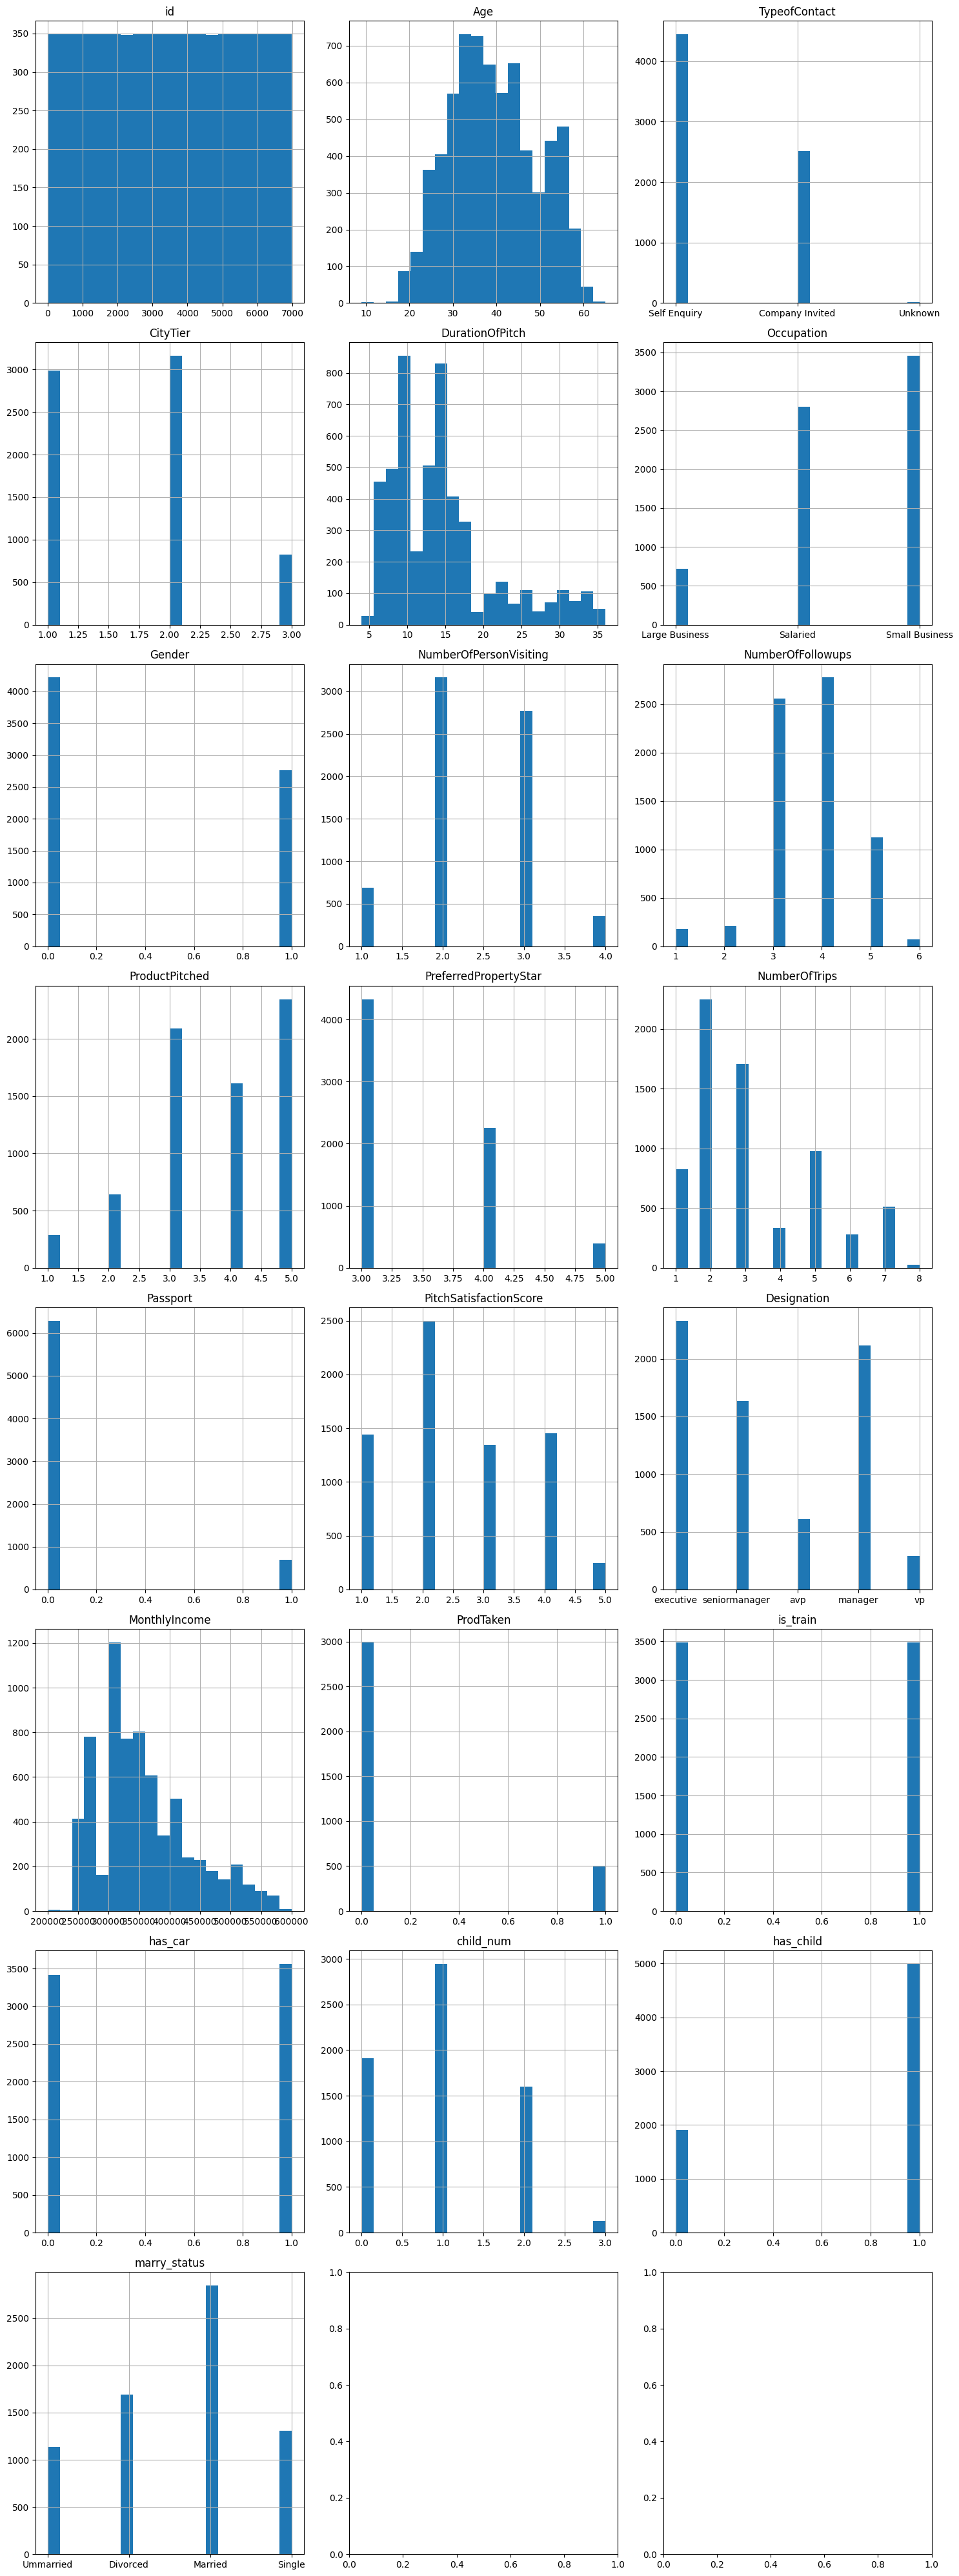

In [ ]:
# ÂêÑ„Ç´„É©„É†„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÊèèÁîª
def plot_histograms(df):
    num_columns = len(df.columns)
    num_rows = (num_columns + 2) // 3  # 1Ë°å„ÅÇ„Åü„Çä3„Å§„ÅÆ„Ç´„É©„É†„ÇíË°®Á§∫„Åô„Çã
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    for i, column in enumerate(df.columns):
        ax = axes[i // 3, i % 3]
        df[column].dropna().hist(ax=ax, bins=20)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

# „Éí„Çπ„Éà„Ç∞„É©„É†„ÅÆÊèèÁîª„ÇíÂÆüË°å
plot_histograms(combined_data)

In [ ]:
# „Ç™„Éñ„Ç∏„Çß„ÇØ„ÉàÂûã„ÅÆ„Ç´„É©„É†„ÇíÊäΩÂá∫
object_columns = combined_data.select_dtypes(include=['object']).columns

# One-hot„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞„ÇíÂÆüË°å
combined_data_encoded = pd.get_dummies(combined_data, columns=object_columns)

combined_data_encoded.head()

id   Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.0         2              NaN       0                     1.0   
1   1  56.0         1             14.0       0                     1.0   
2   2   NaN         1             10.0       1                     1.0   
3   3  37.0         2              NaN       1                     1.0   
4   4  48.0         3              NaN       1                     1.0   

   NumberOfFollowups  ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                4.0               5                    3.0            5.0   
1                4.0               4                    3.0            2.0   
2                3.0               5                    3.0            4.0   
3                3.0               4                    4.0            1.0   
4                3.0               5                    4.0            4.0   

   ...  Occupation_Small Business  Designation_avp  Designation_executive  \
0  ...                      False            False                   True   
1  ...                      False            False                  False   
2  ...                      False            False                   True   
3  ...                       True            False                  False   
4  ...                       True            False                   True   

   Designation_manager  Designation_seniormanager  Designation_vp  \
0                False                      False           False   
1                False                       True           False   
2                False                      False           False   
3                False                       True           False   
4                False                      False           False   

   marry_status_Divorced  marry_status_Married  marry_status_Single  \
0                  False                 False                False   
1                   True                 False                False   
2                  False                  True                False   
3                   True                 False                False   
4                  False                 False                 True   

   marry_status_Ummarried  
0                    True  
1                   False  
2                   False  
3                   False  
4                   False  

[5 rows x 33 columns]

In [ ]:
combined_data_encoded.dtypes

id                                 int64
Age                              float64
CityTier                           int64
DurationOfPitch                  float64
Gender                             int64
NumberOfPersonVisiting           float64
NumberOfFollowups                float64
ProductPitched                     int64
PreferredPropertyStar            float64
NumberOfTrips                    float64
Passport                           int64
PitchSatisfactionScore             int64
MonthlyIncome                    float64
ProdTaken                        float64
is_train                           int64
has_car                            int64
child_num                        float64
has_child                        float64
TypeofContact_Company Invited       bool
TypeofContact_Self Enquiry          bool
TypeofContact_Unknown               bool
Occupation_Large Business           bool
Occupation_Salaried                 bool
Occupation_Small Business           bool
Designation_avp                     bool
Designation_executive               bool
Designation_manager                 bool
Designation_seniormanager           bool
Designation_vp                      bool
marry_status_Divorced               bool
marry_status_Married                bool
marry_status_Single                 bool
marry_status_Ummarried              bool
dtype: object

## Age„Å®MonthlyIncome„Å®DurationOfPitch„ÅÆÊ¨†ÊêçÂÄ§„ÇíË£úÂÆå„Åô„Çã


In [ ]:
# # 'Age' „Å® 'MonthlyIncome' „Åå -1 „ÅÆ„ÇÇ„ÅÆ„Çí NaN „Å´ÁΩÆÊèõ
# combined_data_encoded['Age'] = combined_data_encoded['Age'].replace(-1, np.nan)
# # combined_data_encoded['MonthlyIncome'] = combined_data_encoded['MonthlyIncome'].replace(-1, np.nan)

# # Á¢∫Ë™ç„ÅÆ„Åü„ÇÅ„ÅÆÂá∫Âäõ
# # print(combined_data_encoded.isnull().sum())

In [ ]:
# Ê¨†ÊêçÂÄ§„ÅÆ„ÅÇ„ÇãÂàó„ÇíÁâπÂÆöÔºà‰æã: 'target_column'„Å´Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çã„Å®‰ªÆÂÆöÔºâ
target_column = 'Age'

# 'ProdTaken'„Ç´„É©„É†„ÇíÈô§Â§ñ„Åó„Å¶ÁâπÂæ¥Èáè„ÇíÈÅ∏Êäû
X = combined_data_encoded.drop(columns=[target_column, 'ProdTaken','id','is_train'])
y = combined_data_encoded[target_column]

# Ê¨†ÊêçÂÄ§„ÅÆ„Å™„ÅÑ„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÇíË®ìÁ∑¥
X_train = X[~y.isna()]
y_train = y[~y.isna()]

# Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çã„Éá„Éº„Çø„ÇíÁâπÂÆö
X_missing = X[y.isna()]

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÅÆÂÆöÁæ©„Å®Ë®ìÁ∑¥
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ê¨†ÊêçÂÄ§„ÅÆ‰∫àÊ∏¨
y_pred = rf.predict(X_missing)

# Ê¨†ÊêçÂÄ§„ÅÆË£úÂÆå
combined_data_encoded.loc[y.isna(), target_column] = y_pred

# Ë£úÂÆåÂæå„ÅÆ„Éá„Éº„Çø„ÇíË°®Á§∫
# print(combined_data_encoded.isnull().sum())

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 'Age' „Å® 'MonthlyIncome' „Åå -1 „ÅÆ„ÇÇ„ÅÆ„Çí NaN „Å´ÁΩÆÊèõ
# combined_data_encoded['Age'] = combined_data_encoded['Age'].replace(-1, np.nan)
combined_data_encoded['MonthlyIncome'] = combined_data_encoded['MonthlyIncome'].replace(-1, np.nan)

# Á¢∫Ë™ç„ÅÆ„Åü„ÇÅ„ÅÆÂá∫Âäõ
# print(combined_data_encoded.isnull().sum())

In [ ]:
# Ê¨†ÊêçÂÄ§„ÅÆ„ÅÇ„ÇãÂàó„ÇíÁâπÂÆöÔºà‰æã: 'target_column'„Å´Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çã„Å®‰ªÆÂÆöÔºâ
target_column = 'MonthlyIncome'

# 'ProdTaken'„Ç´„É©„É†„ÇíÈô§Â§ñ„Åó„Å¶ÁâπÂæ¥Èáè„ÇíÈÅ∏Êäû
X = combined_data_encoded.drop(columns=[target_column, 'ProdTaken','id','is_train'])
y = combined_data_encoded[target_column]

# Ê¨†ÊêçÂÄ§„ÅÆ„Å™„ÅÑ„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÇíË®ìÁ∑¥
X_train = X[~y.isna()]
y_train = y[~y.isna()]

# Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çã„Éá„Éº„Çø„ÇíÁâπÂÆö
X_missing = X[y.isna()]

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÅÆÂÆöÁæ©„Å®Ë®ìÁ∑¥
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ê¨†ÊêçÂÄ§„ÅÆ‰∫àÊ∏¨
y_pred = rf.predict(X_missing)

# Ê¨†ÊêçÂÄ§„ÅÆË£úÂÆå
combined_data_encoded.loc[y.isna(), target_column] = y_pred

# Ë£úÂÆåÂæå„ÅÆ„Éá„Éº„Çø„ÇíË°®Á§∫
# print(combined_data_encoded.isnull().sum())

In [ ]:
combined_data_encoded['DurationOfPitch'] = combined_data_encoded['DurationOfPitch'].replace(-1, np.nan)

# Á¢∫Ë™ç„ÅÆ„Åü„ÇÅ„ÅÆÂá∫Âäõ
# print(combined_data_encoded.isnull().sum())

In [ ]:
# Ê¨†ÊêçÂÄ§„ÅÆ„ÅÇ„ÇãÂàó„ÇíÁâπÂÆöÔºà‰æã: 'target_column'„Å´Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çã„Å®‰ªÆÂÆöÔºâ
target_column = 'DurationOfPitch'

# 'ProdTaken'„Ç´„É©„É†„ÇíÈô§Â§ñ„Åó„Å¶ÁâπÂæ¥Èáè„ÇíÈÅ∏Êäû
X = combined_data_encoded.drop(columns=[target_column, 'ProdTaken','id','is_train'])
y = combined_data_encoded[target_column]

# Ê¨†ÊêçÂÄ§„ÅÆ„Å™„ÅÑ„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÇíË®ìÁ∑¥
X_train = X[~y.isna()]
y_train = y[~y.isna()]

# Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çã„Éá„Éº„Çø„ÇíÁâπÂÆö
X_missing = X[y.isna()]

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÅÆÂÆöÁæ©„Å®Ë®ìÁ∑¥
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ê¨†ÊêçÂÄ§„ÅÆ‰∫àÊ∏¨
y_pred = rf.predict(X_missing)

# Ê¨†ÊêçÂÄ§„ÅÆË£úÂÆå
combined_data_encoded.loc[y.isna(), target_column] = y_pred

# Ë£úÂÆåÂæå„ÅÆ„Éá„Éº„Çø„ÇíË°®Á§∫
# print(combined_data_encoded.isnull().sum())

In [ ]:
combined_data_encoded = combined_data_encoded.astype(float)

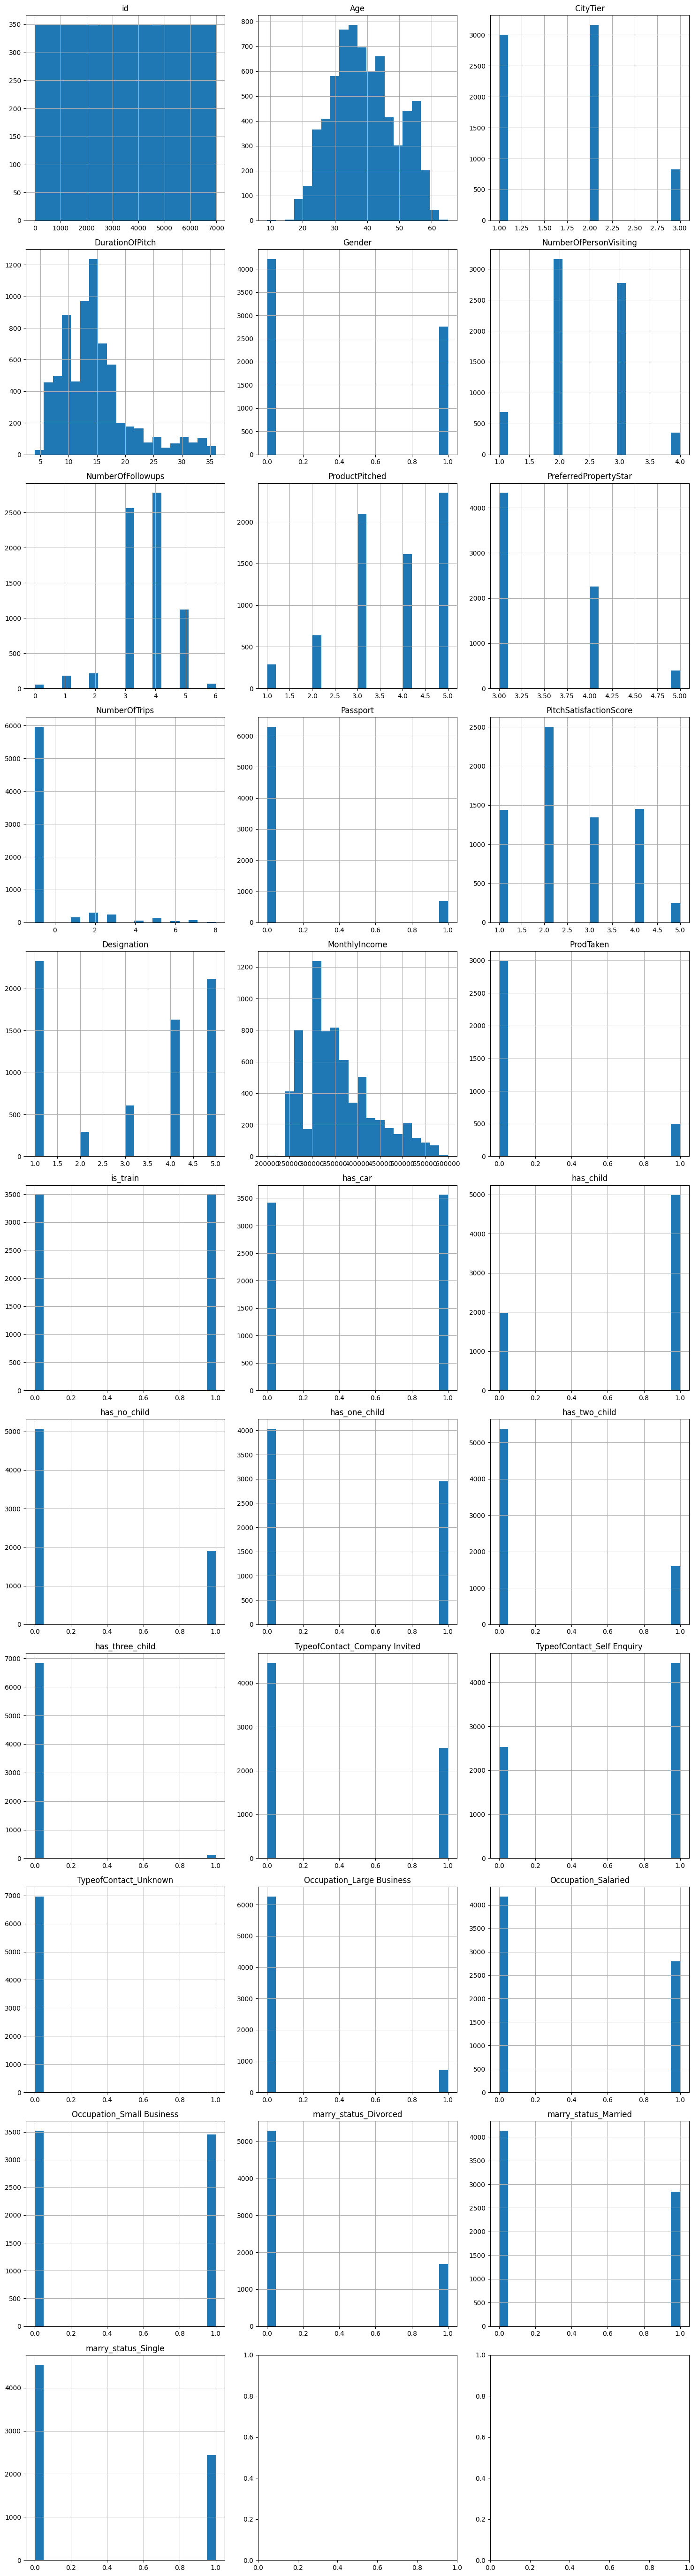

In [ ]:
# ÂêÑ„Ç´„É©„É†„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÊèèÁîª
def plot_histograms(df):
    num_columns = len(df.columns)
    num_rows = (num_columns + 2) // 3  # 1Ë°å„ÅÇ„Åü„Çä3„Å§„ÅÆ„Ç´„É©„É†„ÇíË°®Á§∫„Åô„Çã
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    for i, column in enumerate(df.columns):
        ax = axes[i // 3, i % 3]
        df[column].dropna().hist(ax=ax, bins=20)
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

# „Éí„Çπ„Éà„Ç∞„É©„É†„ÅÆÊèèÁîª„ÇíÂÆüË°å
plot_histograms(combined_data_encoded)

# 4.3 „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíË®ìÁ∑¥„Éá„Éº„Çø„Çª„ÉÉ„Éà„Å®„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çª„ÉÉ„Éà„Å´ÂàÜÂâ≤„Åô„Çã

In [ ]:
# combined_data_encoded„Çítrain„Å®test„ÅÆ„Åß„Éº„Åü„Çª„ÉÉ„Éà„Å´Êàª„Åô

train = combined_data_encoded[combined_data_encoded['is_train'] == 1]
test = combined_data_encoded[combined_data_encoded['is_train'] == 0]

# "ProdTaken"„ÅØ‰∫àÊ∏¨ÂØæË±°„Å®„Åô„Çã„Åü„ÇÅ„ÄÅÂà•ÈÄîtargetÂ§âÊï∞„Å´Ê†ºÁ¥ç„Åô„Çã
target = train["ProdTaken"]

train.drop(['is_train','ProdTaken','id'], axis=1, inplace=True)
test.drop(['is_train','ProdTaken','id'], axis=1, inplace=True)

<ipython-input-51-81a586c3fdf5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['is_train','ProdTaken','id'], axis=1, inplace=True)
<ipython-input-51-81a586c3fdf5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['is_train','ProdTaken','id'], axis=1, inplace=True)


In [ ]:
train.shape

(3489, 28)

In [ ]:
test.shape

(3489, 28)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
        train, target, test_size=0.3, random_state=42, stratify=target
)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(2442, 28) (1047, 28) (2442,) (1047,)


## 5. Â≠¶Áøí„Å®Ê§úË®º

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 278, number of negative: 1675
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 1953, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142345 -> initscore=-1.795947
[LightGBM] [Info] Start training from score -1.795947
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 278, number of negative: 1675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number

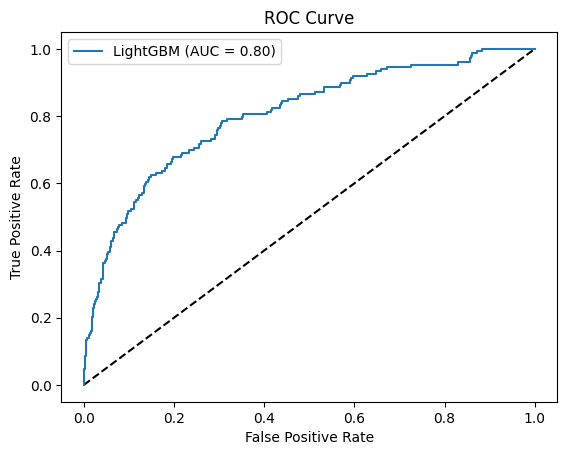

In [ ]:
# LightGBM„ÅÆ„Ç§„É≥„Çπ„Çø„É≥„Çπ„Çí‰ΩúÊàê
lgb_model = lgb.LGBMClassifier(random_state=42)

# StratifiedKFold„ÅÆË®≠ÂÆö (stratify=target„ÅÆË¶ÅÁ¥†„ÇíÊåÅ„Åü„Åõ„Çã)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ‰∫§Â∑ÆÊ§úË®º„ÅÆÂÆüË°å
cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring='roc_auc')

# ‰∫§Â∑ÆÊ§úË®ºÁµêÊûú„ÅÆË°®Á§∫
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores)}")

# ‰∫§Â∑ÆÊ§úË®ºÂæå„ÄÅÂÖ®„Éá„Éº„Çø„Åß„É¢„Éá„É´„ÇíÂÜç„Éà„É¨„Éº„Éã„É≥„Ç∞
lgb_model.fit(X_train, y_train)

# y_valid„Å´ÂØæ„Åô„Çã‰∫àÊ∏¨Á¢∫Áéá„ÇíË®àÁÆó
# pred_proba[:, 1] „ÅØÈôΩÊÄß„ÇØ„É©„ÇπÔºà1Ôºâ„Å´ÂØæ„Åô„ÇãÁ¢∫Áéá
pred_proba = lgb_model.predict_proba(X_valid)

# ROCÊõ≤Á∑ö„ÇíË®àÁÆó
fpr, tpr, thresholds = roc_curve(y_valid, pred_proba[:, 1])

# ROC AUC„Çπ„Ç≥„Ç¢„ÅÆË®àÁÆó
roc_auc = roc_auc_score(y_valid, pred_proba[:, 1])
print(f"ROC AUC: {roc_auc}")

# ROCÊõ≤Á∑ö„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.plot([0, 1], [0, 1], 'k--')  # Êñú„ÇÅ„ÅÆÂü∫Ê∫ñÁ∑ö
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

MonthlyIncome: 668
Age: 475
DurationOfPitch: 459
PitchSatisfactionScore: 163
NumberOfPersonVisiting: 107
NumberOfFollowups: 98
CityTier: 94
Gender: 91
Designation: 89
NumberOfTrips: 76
PreferredPropertyStar: 67
Passport: 66
has_car: 65
Occupation_Salaried: 54
ProductPitched: 53
TypeofContact_Company Invited: 52
marry_status_Married: 50
marry_status_Single: 49
has_one_child: 41
Occupation_Small Business: 37
marry_status_Divorced: 35
has_two_child: 28
Occupation_Large Business: 26
has_child: 19
has_no_child: 19
TypeofContact_Self Enquiry: 19
has_three_child: 0
TypeofContact_Unknown: 0


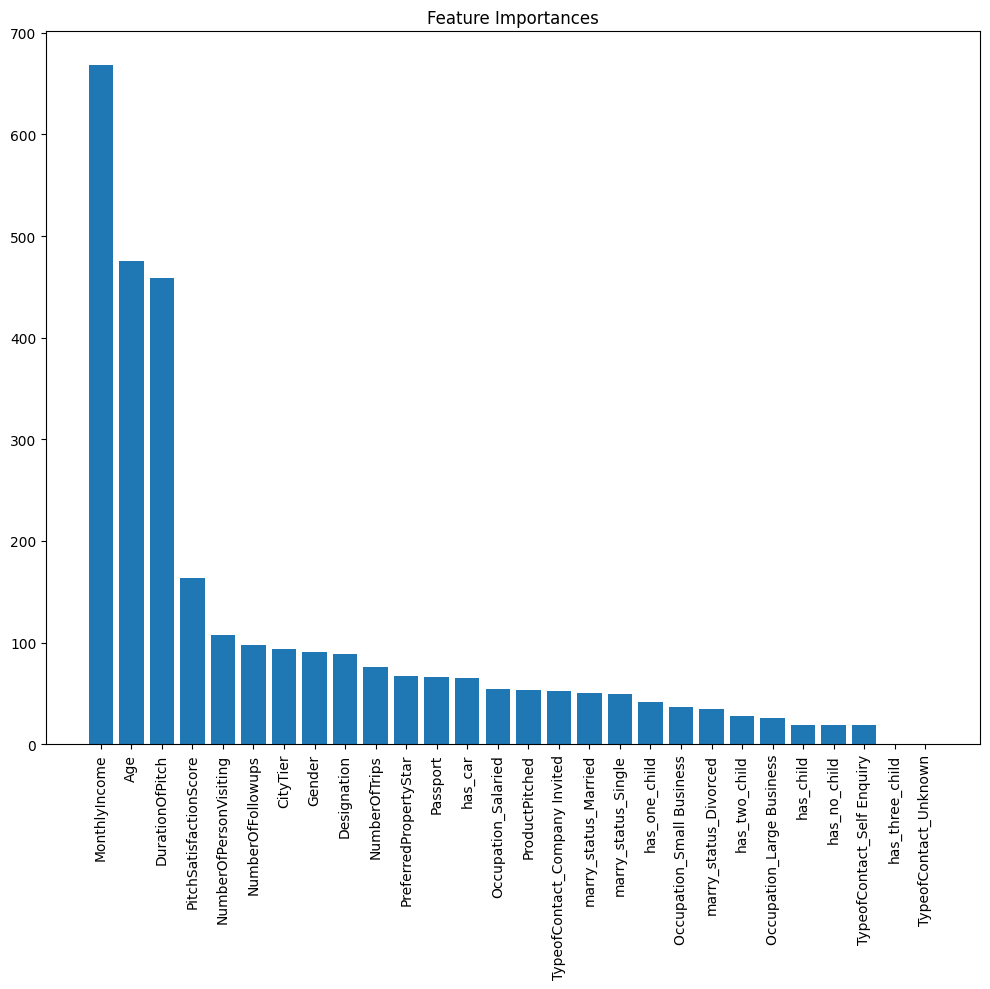

In [ ]:
# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÊäΩÂá∫„Åô„Çã
importances = lgb_model.feature_importances_

# ÈáçË¶ÅÂ∫¶„ÅÆÈôçÈ†Ü„ÅßÁâπÂæ¥Èáè„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÊäΩÂá∫
indices = np.argsort(importances)[::-1]

# ÈáçË¶ÅÂ∫¶„ÅÆÈôçÈ†Ü„ÅßÁâπÂæ¥Èáè„ÅÆÂêçÁß∞„ÄÅÈáçË¶ÅÂ∫¶„ÇíË°®Á§∫
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")

# Ë°®Á§∫„Åô„Çã
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


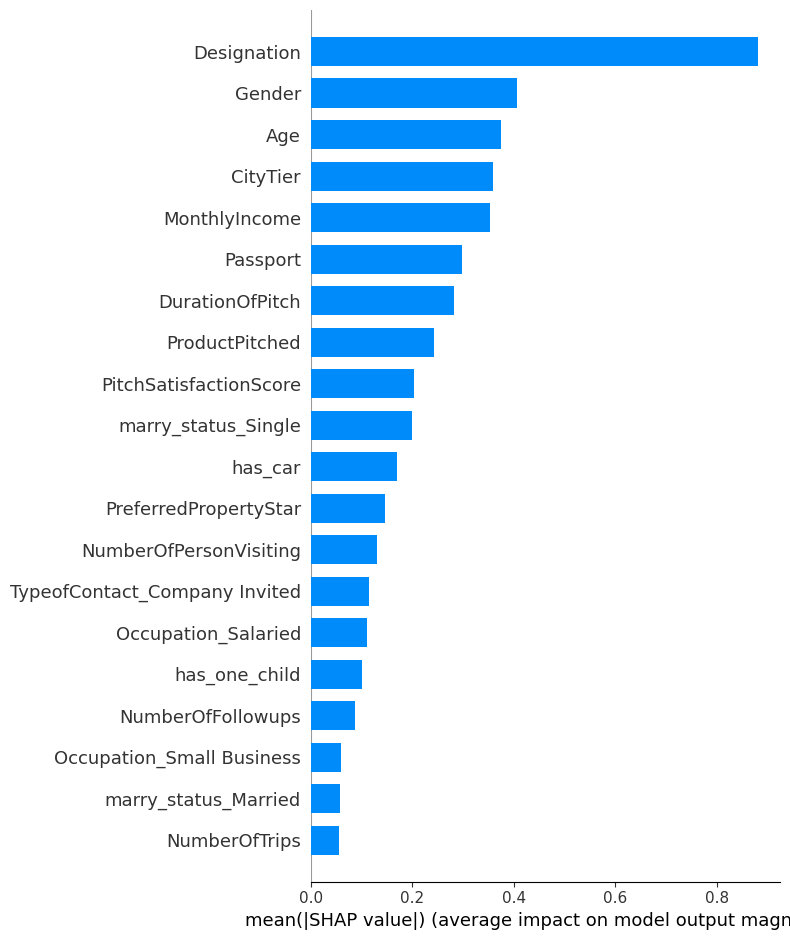

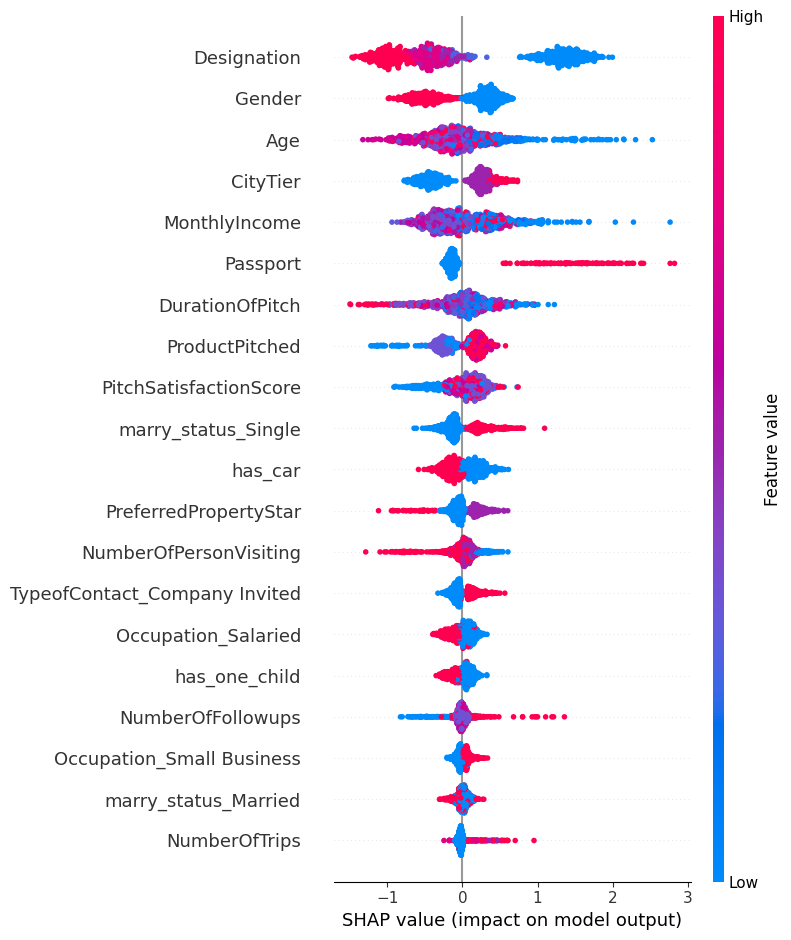

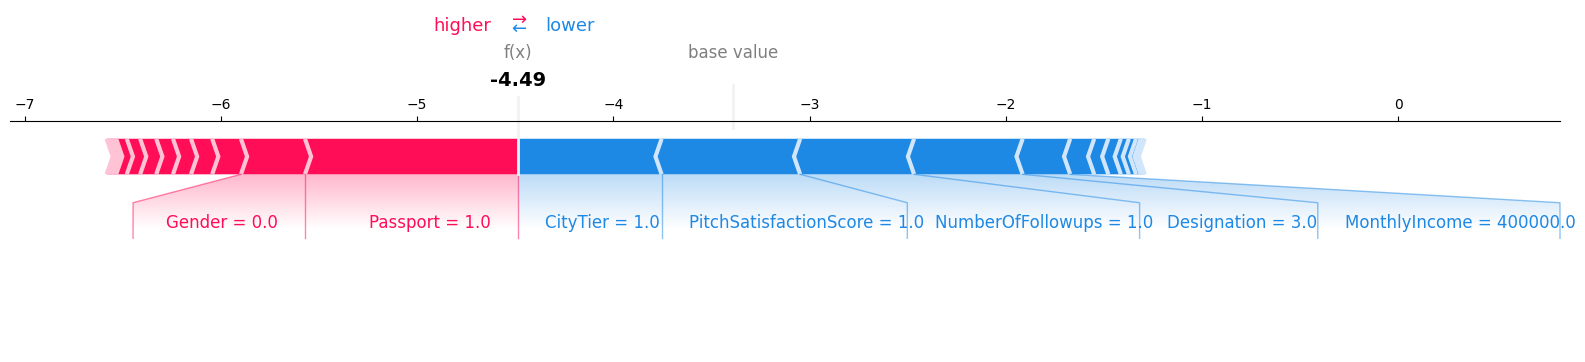

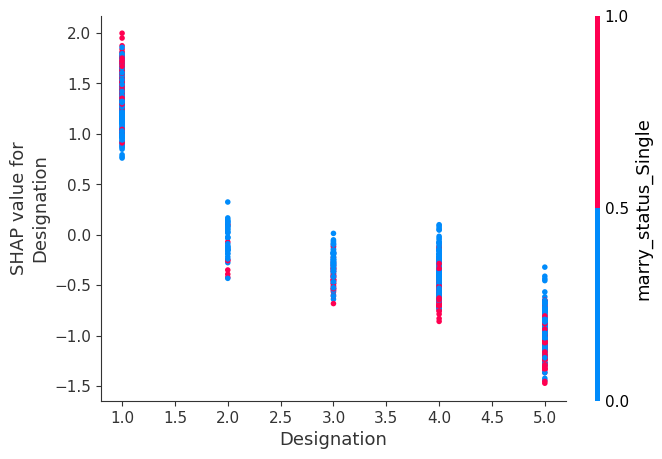

In [ ]:

# SHAP„ÅÆexplainer„Çí‰ΩúÊàê
explainer = shap.TreeExplainer(lgb_model)

# Ê§úË®º„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãSHAPÂÄ§„ÇíË®àÁÆó
shap_values = explainer.shap_values(X_valid)

# ÂêÑÁâπÂæ¥Èáè„ÅÆÂØÑ‰∏éÂ∫¶„ÇíÂèØË¶ñÂåñ„Åô„Çãsummary plot
shap.summary_plot(shap_values, X_valid, plot_type="bar")

# ÂêÑÁâπÂæ¥Èáè„ÅÆÂΩ±ÈüøÊñπÂêë„ÇíÂèØË¶ñÂåñ„Åô„Çãsummary plotÔºàÂΩ±ÈüøÊñπÂêëËæº„ÅøÔºâ
shap.summary_plot(shap_values, X_valid)

# ÁâπÂÆö„ÅÆ„Éá„Éº„Çø„Éù„Ç§„É≥„Éà„Å´ÂØæ„Åô„ÇãSHAP„ÅÆforce plot„ÇíË°®Á§∫
# „Åì„Åì„Åß„ÅØ„ÄÅÊ§úË®º„Éá„Éº„Çø„ÅÆÊúÄÂàù„ÅÆ„Çµ„É≥„Éó„É´„Çí‰æã„Å´„Å®„Çä„Åæ„Åô
shap.force_plot(explainer.expected_value, shap_values[0,:], X_valid.iloc[0,:], matplotlib=True)

# ÁâπÂÆö„ÅÆ„Éá„Éº„Çø„Éù„Ç§„É≥„Éà„Å´ÂØæ„Åô„ÇãSHAP„ÅÆdependence plot„ÇíË°®Á§∫
# „Åì„Åì„Åß„ÅØ„ÄÅÊúÄ„ÇÇÈáçË¶Å„Å™ÁâπÂæ¥Èáè„ÇíÈÅ∏„Çì„ÅßÂèØË¶ñÂåñ„Åó„Åæ„Åô
shap.dependence_plot(np.argmax(np.abs(shap_values).mean(0)), shap_values, X_valid)


# 5. Â≠¶Áøí„Å®Ê§úË®º


In [ ]:
# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÅÆ„Ç§„É≥„Çπ„Çø„É≥„Çπ„Çí‰ΩúÊàê
rf = RandomForestClassifier(random_state=42)

# „Éë„É©„É°„Éº„Çø„ÅÆ„Ç∞„É™„ÉÉ„Éâ„ÇíÂÆöÁæ©
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# „Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅ„ÇíË®≠ÂÆöÔºà3ÂàÜÂâ≤„ÅÆ„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Çí‰ΩøÁî®Ôºâ
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„Éï„Ç£„ÉÉ„ÉÜ„Ç£„É≥„Ç∞
grid_search.fit(X_train, y_train)

# ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„ÇíË°®Á§∫
print("Best parameters found: ", grid_search.best_params_)

# ÊúÄÈÅ©„Å™„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çí‰∫àÊ∏¨
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_valid)

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶„ÇíË°®Á§∫
print("Test Accuracy: ", accuracy_score(y_valid, y_pred))


AttributeError: 'RandomForestClassifier' object has no attribute 'best_params_'

In [ ]:
# # „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„É¢„Éá„É´„ÇíÂëº„Å≥Âá∫„Åó„Åæ„Åô„ÄÇ„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅØÂÆüË°å„Åô„Çã„Åü„Å≥„Å´Â≠¶ÁøíÁµêÊûú„ÅåÂ§â„Çè„Çã„Åì„Å®„Åå„ÅÇ„Çã„ÅÆ„Åßrandom_state„Å´Êï∞Â≠ó„ÇíÊåáÂÆö„Åó„Å¶ÁµêÊûú„ÇíÂõ∫ÂÆö„Åó„Åæ„Åô„ÄÇ
# model = RandomForestClassifier(random_state=42)
# # model.fit() „ÅßÂ≠¶Áøí„Åó„Åæ„Åô„ÄÇË®ìÁ∑¥„Éá„Éº„Çø„Å®Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆÁõÆÁöÑÂ§âÊï∞„ÇíÊåáÂÆö„Åó„Åæ„Åô„ÄÇ
# model.fit(X_train, y_train)

In [ ]:
# predict_proba() „Åß‰∫àÊ∏¨„Åó„Åæ„Åô„ÄÇ‰∫àÊ∏¨„Åó„Åü„ÅÑ„Éá„Éº„Çø„ÇíÂÖ•Âäõ„Åó„Åæ„Åô„ÄÇ
pred = best_rf.predict_proba(X_valid)

In [ ]:
# ‰∫àÊ∏¨„ÅÆ‰∏≠Ë∫´„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åô
print(pred[:5])

In [ ]:
y_valid[:5]

In [ ]:
# AUC„ÅÆË©ï‰æ°„ÅØroc_auc_score(Ê≠£Ëß£„Éá„Éº„Çø, ‰∫àÊ∏¨„Éá„Éº„Çø)„ÅßÂèØËÉΩ„Åß„Åô„ÄÇ
# ÊàêÁ¥Ñ„Åó„Åü„Åã„Å©„ÅÜ„Åã„ÇíÂà§ÂÆö„Åô„Çã„Åü„ÇÅ„ÄÅ2ÂàóÁõÆ„ÅÆ1„ÅÆÁ¢∫Áéá(ÊàêÁ¥Ñ„Åó„Å¶„ÅÑ„ÇãÁ¢∫Áéá)„Çí‰∫àÊ∏¨„Éá„Éº„Çø„Å®„Åó„Å¶ÂÖ•Âäõ„Åó„Åæ„Åô„ÄÇ
score = roc_auc_score(y_valid, pred[:, 1])
print(score)

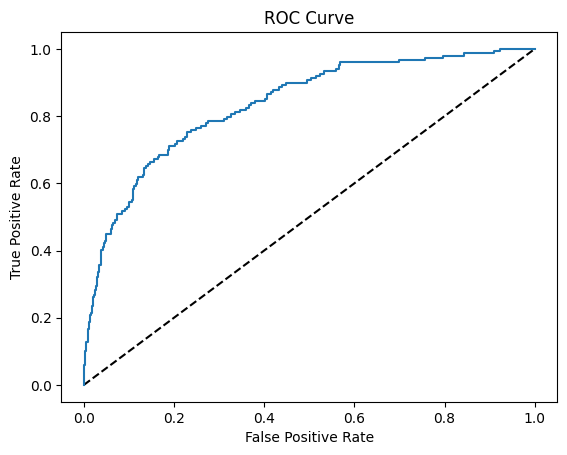

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÂèØË¶ñÂåñ„Åô„Çã

Age: 0.13476689729626246
MonthlyIncome: 0.13108689940090412
Designation: 0.08235782455362749
DurationOfPitch: 0.0806525322782791
ProductPitched: 0.07792500186884642
marry_status_Single: 0.06501464421376583
Passport: 0.04161342201604481
PitchSatisfactionScore: 0.03726798898259581
NumberOfFollowups: 0.0343568195130911
CityTier: 0.032273235409765656
NumberOfPersonVisiting: 0.028101755647275926
NumberOfTrips: 0.026331462897803606
PreferredPropertyStar: 0.018672673154750827
has_car: 0.018101413920750688
Gender_M: 0.017516016821210578
marry_status_Married: 0.016594927963426695
Gender_F: 0.016194278495419184
Occupation_Salaried: 0.016136963443893534
Occupation_Large Business: 0.014807065733014813
has_child: 0.014734000492993189
TypeofContact_Self Enquiry: 0.01442791813620436
has_no_child: 0.013219076518294093
TypeofContact_Company Invited: 0.013213115532989555
Occupation_Small Business: 0.012605678270976022
marry_status_Divorced: 0.010871192541229454
has_one_child: 0.010153682492855127
has_tw

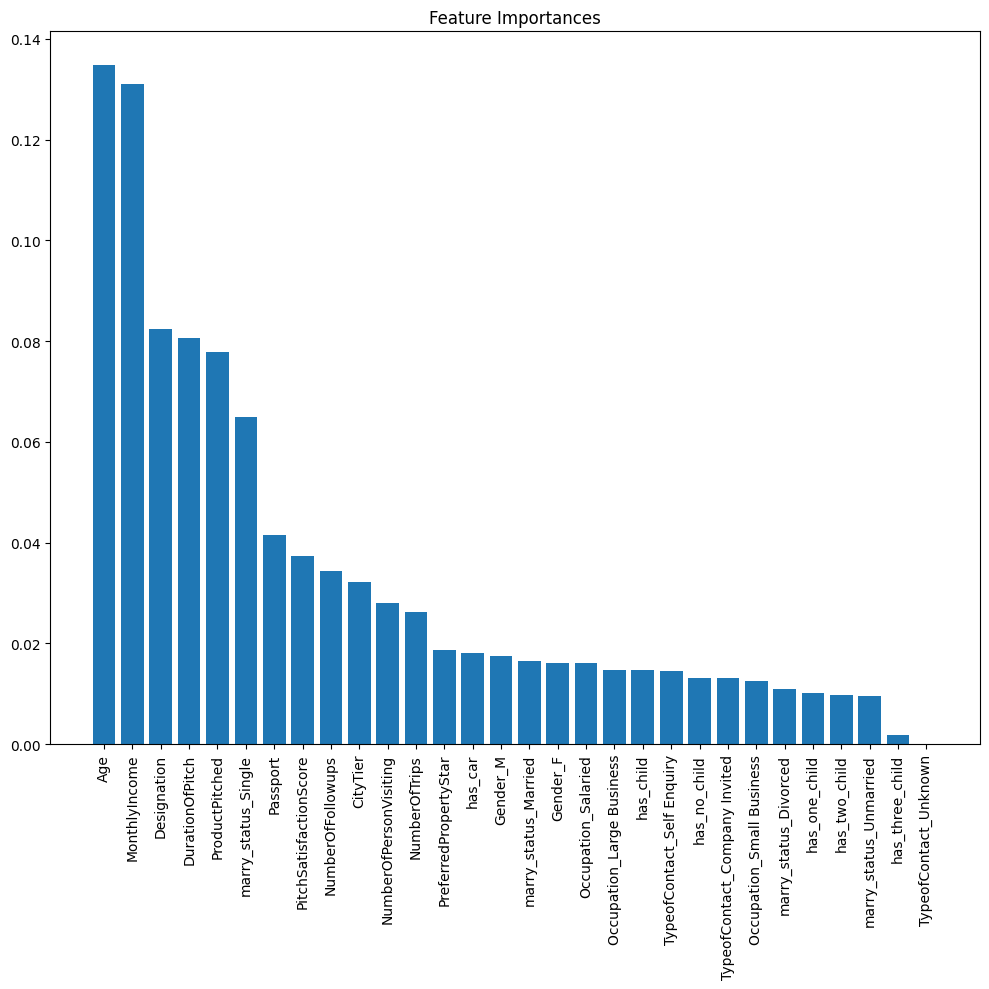

In [ ]:
# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÊäΩÂá∫„Åô„Çã
importances = best_rf.feature_importances_

# ÈáçË¶ÅÂ∫¶„ÅÆÈôçÈ†Ü„ÅßÁâπÂæ¥Èáè„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÊäΩÂá∫
indices = np.argsort(importances)[::-1]

# ÈáçË¶ÅÂ∫¶„ÅÆÈôçÈ†Ü„ÅßÁâπÂæ¥Èáè„ÅÆÂêçÁß∞„ÄÅÈáçË¶ÅÂ∫¶„ÇíË°®Á§∫
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")

# Ë°®Á§∫„Åô„Çã
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
print(X_valid.dtypes)

Age                              float64
CityTier                         float64
DurationOfPitch                  float64
NumberOfPersonVisiting           float64
NumberOfFollowups                float64
ProductPitched                   float64
PreferredPropertyStar            float64
NumberOfTrips                    float64
Passport                         float64
PitchSatisfactionScore           float64
Designation                      float64
MonthlyIncome                    float64
has_car                          float64
has_child                        float64
has_no_child                     float64
has_one_child                    float64
has_two_child                    float64
has_three_child                  float64
TypeofContact_Company Invited    float64
TypeofContact_Self Enquiry       float64
TypeofContact_Unknown            float64
Occupation_Large Business        float64
Occupation_Salaried              float64
Occupation_Small Business        float64
Gender_F        

In [ ]:
print(X_valid.dtypes)

Age                              float64
CityTier                         float64
DurationOfPitch                  float64
NumberOfPersonVisiting           float64
NumberOfFollowups                float64
ProductPitched                   float64
PreferredPropertyStar            float64
NumberOfTrips                    float64
Passport                         float64
PitchSatisfactionScore           float64
Designation                      float64
MonthlyIncome                    float64
has_car                          float64
has_child                        float64
has_no_child                     float64
has_one_child                    float64
has_two_child                    float64
has_three_child                  float64
TypeofContact_Company Invited    float64
TypeofContact_Self Enquiry       float64
TypeofContact_Unknown            float64
Occupation_Large Business        float64
Occupation_Salaried              float64
Occupation_Small Business        float64
Gender_F        

In [ ]:
X_valid = X_valid.astype(float)


In [ ]:
# explainer„ÅÆ‰ΩúÊàê
explainer = shap.TreeExplainer(
      model=best_rf
      ,data=X_valid)

# SHAPÂÄ§„ÅÆË®àÁÆó
shap_values = explainer.shap_values(X_valid)

 99%|===================| 2079/2094 [00:46<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.956473, while the model output was 0.966373. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
shap.plots.bar(shap_values=shap_values)

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [ ]:
# SHAP summary plot
shap.plots.beeswarm(shap_values, max_display=10)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

## lightGBM„É¢„Éá„É´„ÅÆ‰ΩúÊàê

In [ ]:
# LightGBM„ÅÆ„Ç§„É≥„Çπ„Çø„É≥„Çπ„Çí‰ΩúÊàê
lgb_model = lgb.LGBMClassifier(random_state=42)

# „Éë„É©„É°„Éº„Çø„ÅÆ„Ç∞„É™„ÉÉ„Éâ„ÇíÂÆöÁæ©
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [20, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# „Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅ„ÇíË®≠ÂÆöÔºà3ÂàÜÂâ≤„ÅÆ„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Çí‰ΩøÁî®Ôºâ
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶„Éï„Ç£„ÉÉ„ÉÜ„Ç£„É≥„Ç∞
grid_search.fit(X_train, y_train)

# ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„ÇíË°®Á§∫
print("Best parameters found: ", grid_search.best_params_)

# ÊúÄÈÅ©„Å™„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çí‰∫àÊ∏¨
best_lgb = grid_search.best_estimator_
y_pred = best_lgb.predict(X_valid)

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶„ÇíË°®Á§∫
print("Test Accuracy: ", accuracy_score(y_valid, y_pred))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


KeyboardInterrupt: 

In [ ]:
# predict_proba() „Åß‰∫àÊ∏¨„Åó„Åæ„Åô„ÄÇ‰∫àÊ∏¨„Åó„Åü„ÅÑ„Éá„Éº„Çø„ÇíÂÖ•Âäõ„Åó„Åæ„Åô„ÄÇ
pred = best_lgb.predict_proba(X_valid)

In [ ]:
# AUC„ÅÆË©ï‰æ°„ÅØroc_auc_score(Ê≠£Ëß£„Éá„Éº„Çø, ‰∫àÊ∏¨„Éá„Éº„Çø)„ÅßÂèØËÉΩ„Åß„Åô„ÄÇ
# ÊàêÁ¥Ñ„Åó„Åü„Åã„Å©„ÅÜ„Åã„ÇíÂà§ÂÆö„Åô„Çã„Åü„ÇÅ„ÄÅ2ÂàóÁõÆ„ÅÆ1„ÅÆÁ¢∫Áéá(ÊàêÁ¥Ñ„Åó„Å¶„ÅÑ„ÇãÁ¢∫Áéá)„Çí‰∫àÊ∏¨„Éá„Éº„Çø„Å®„Åó„Å¶ÂÖ•Âäõ„Åó„Åæ„Åô„ÄÇ
score = roc_auc_score(y_valid, pred[:, 1])
print(score)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valid, pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 6 ÊèêÂá∫

In [ ]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÇíÁî®„ÅÑ„Å¶‰∫àÊ∏¨„Åó„Åæ„Åô„ÄÇ
predict = best_rf.predict_proba(test)

In [ ]:
# submit_sample.csv„ÇíË™≠„ÅøËæº„Åø„Åæ„Åô„ÄÇ
submit = pd.read_csv("/content/drive/MyDrive/SIGNATE_Cup 2024/data/sample_submit.csv", header=None)
submit.head()

0         1
0  3489  0.119451
1  3490  0.343575
2  3491  0.119451
3  3492  0.119451
4  3493  0.119451

In [ ]:
# ÊèêÂá∫„Éï„Ç°„Ç§„É´„ÅÆ2ÂàóÁõÆ„Çí‰∫àÊ∏¨ÂÄ§„ÅßÁΩÆ„ÅçÊèõ„Åà„Åæ„Åô„ÄÇ
submit[1] = predict[:, 1]

In [ ]:
#Á¢∫Ë™ç„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜ
submit.head()

0         1
0  3489  0.051985
1  3490  0.135750
2  3491  0.342451
3  3492  0.345424
4  3493  0.424852

In [ ]:
#submission.csv„Åß„Éá„Éº„Çø„Çí‰øùÂ≠ò(ÊèêÂá∫ÊßòÂºè„ÅØindex=False, header=None„Å®„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ)
submit.to_csv("submission.csv", index=False, header=None)

In [ ]:
# „Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíÊåáÂÆö„Åó„Å¶‰øùÂ≠ò
file_path = '/content/drive/My Drive/submission.csv'
submit.to_csv(file_path, index=False, header=None)

print(f'File saved to {file_path}')

File saved to /content/drive/My Drive/submission.csv


## 99 EDA

In [ ]:
combined_data.head()

id  Age    TypeofContact  CityTier  DurationOfPitch      Occupation Gender  \
0   0   50     Self Enquiry         2               -1  Large Business      M   
1   1   56  Company Invited         1               14        Salaried      M   
2   2   -1     Self Enquiry         1               10  Large Business      F   
3   3   37     Self Enquiry         2               -1  Small Business      F   
4   4   48  Company Invited         3               -1  Small Business      F   

   NumberOfPersonVisiting  NumberOfFollowups ProductPitched  ...  \
0                     1.0                4.0          basic  ...   
1                     1.0                4.0       standard  ...   
2                     1.0                3.0          basic  ...   
3                     1.0                3.0       standard  ...   
4                     1.0                3.0          basic  ...   

   MonthlyIncome  ProdTaken  is_train  has_car  has_child  has_no_child  \
0         253905        1.0         1        0          0             1   
1         404475        0.0         1        1          0             1   
2         278145        1.0         1        0          0             1   
3         326805        0.0         1        1          0             1   
4         258435        1.0         1        1          0             1   

   has_one_child  has_two_child  has_three_child  marry_status  
0              0              0                0     Unmarried  
1              0              0                0      Divorced  
2              0              0                0       Married  
3              0              0                0      Divorced  
4              0              0                0        Single  

[5 rows x 25 columns]

In [ ]:
combined_data.describe()

id          Age     CityTier  DurationOfPitch  \
count  6978.000000  6978.000000  6978.000000      6978.000000   
mean   3488.500000    38.192462     1.689882        10.157352   
std    2014.519422    11.822783     0.671595         9.117308   
min       0.000000    -1.000000     1.000000        -1.000000   
25%    1744.250000    31.000000     1.000000        -1.000000   
50%    3488.500000    38.000000     2.000000        10.000000   
75%    5232.750000    46.000000     2.000000        15.000000   
max    6977.000000    65.000000     3.000000        36.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             6978.000000        6978.000000            6978.000000   
mean                 2.401118           3.635426               3.436515   
std                  0.734134           0.995513               0.599600   
min                  1.000000          -1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  2.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  4.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore  Designation  \
count    6978.000000  6978.000000             6978.000000  6978.000000   
mean       -0.393379     0.098882                2.507022     3.131126   
std         1.617376     0.298525                1.134761     1.675692   
min        -1.000000     0.000000                1.000000     1.000000   
25%        -1.000000     0.000000                2.000000     1.000000   
50%        -1.000000     0.000000                2.000000     4.000000   
75%        -1.000000     0.000000                3.000000     5.000000   
max         8.000000     1.000000                5.000000     5.000000   

       MonthlyIncome    ProdTaken     is_train      has_car    has_child  \
count    6978.000000  3489.000000  6978.000000  6978.000000  6978.000000   
mean   350772.877615     0.142448     0.500000     0.510318     0.715821   
std     87128.713777     0.349559     0.500036     0.499929     0.451055   
min        -1.000000     0.000000     0.000000     0.000000     0.000000   
25%    300000.000000     0.000000     0.000000     0.000000     0.000000   
50%    340312.500000     0.000000     0.500000     1.000000     1.000000   
75%    400000.000000     0.000000     1.000000     1.000000     1.000000   
max    600000.000000     1.000000     1.000000     1.000000     1.000000   

       has_no_child  has_one_child  has_two_child  has_three_child  
count   6978.000000    6978.000000    6978.000000      6978.000000  
mean       0.273574       0.422041       0.229292         0.018487  
std        0.445825       0.493920       0.420408         0.134713  
min        0.000000       0.000000       0.000000         0.000000  
25%        0.000000       0.000000       0.000000         0.000000  
50%        0.000000       0.000000       0.000000         0.000000  
75%        1.000000       1.000000       0.000000         0.000000  
max        1.000000       1.000000       1.000000         1.000000

In [ ]:
combined_data_over_0_age = combined_data[combined_data['Age']>=0]
combined_data_over_0_age.head()

id  Age    TypeofContact  CityTier  DurationOfPitch      Occupation Gender  \
0   0   50     Self Enquiry         2               -1  Large Business      M   
1   1   56  Company Invited         1               14        Salaried      M   
3   3   37     Self Enquiry         2               -1  Small Business      F   
4   4   48  Company Invited         3               -1  Small Business      F   
5   5   19     Self Enquiry         2               16  Small Business      M   

   NumberOfPersonVisiting  NumberOfFollowups ProductPitched  ...  \
0                     1.0                4.0          basic  ...   
1                     1.0                4.0       standard  ...   
3                     1.0                3.0       standard  ...   
4                     1.0                3.0          basic  ...   
5                     1.0                3.0          basic  ...   

   MonthlyIncome  ProdTaken  is_train  has_car  has_child  has_no_child  \
0         253905        1.0         1        0          0             1   
1         404475        0.0         1        1          0             1   
3         326805        0.0         1        1          0             1   
4         258435        1.0         1        1          0             1   
5         260000        0.0         1        0          0             1   

   has_one_child  has_two_child  has_three_child  marry_status  
0              0              0                0     Unmarried  
1              0              0                0      Divorced  
3              0              0                0      Divorced  
4              0              0                0        Single  
5              0              0                0        Single  

[5 rows x 25 columns]

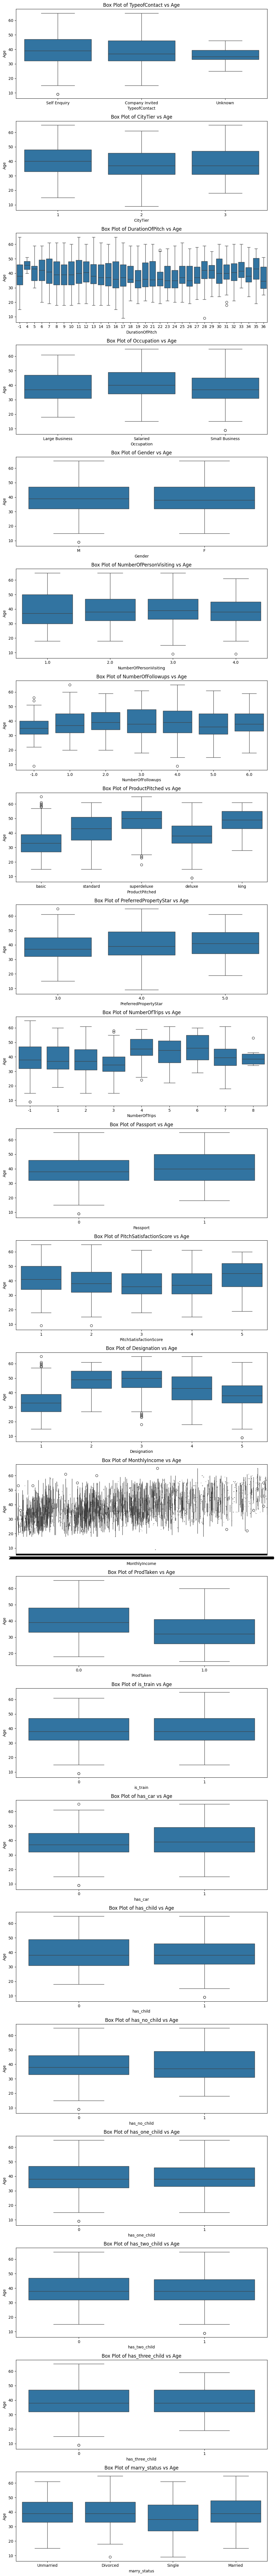

In [ ]:
# 'Age' „Ç´„É©„É†„Çí y Ëª∏„Å®„Åó„Å¶Ë®≠ÂÆö
y = combined_data_over_0_age['Age']

# ÂêÑ„Ç´„É©„É†„ÅÆ„É™„Çπ„ÉàÔºà'Age', 'id', 'MonthlyIncome' „ÅØÈô§Â§ñÔºâ
columns = [col for col in combined_data_over_0_age.columns if col not in ['Age', 'id']]

# „Ç∞„É©„Éï„ÅÆË®≠ÂÆö
fig, axes = plt.subplots(len(columns), 1, figsize=(10, len(columns) * 4))

# ÂêÑ„Ç´„É©„É†„Å´ÂØæ„Åó„Å¶ÁÆ±„Å≤„ÅíÂõ≥„ÇíÊèèÁîª
for i, col in enumerate(columns):
    ax = axes[i]
    sns.boxplot(x=combined_data_over_0_age[col], y=y, ax=ax)
    ax.set_title(f'Box Plot of {col} vs Age')
    ax.set_xlabel(col)
    ax.set_ylabel('Age')

plt.tight_layout()
plt.show()